To avoid problems you should execute the code by using Runtime -> Run all. It takes approximately 10-12 minutes to run all the sections in Colab.

# Data and libraries import

Import of some libraries we use and loading of the dataset.

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jax.numpy as jnp
import jax
from tqdm.notebook import tqdm
from collections import Counter
from sklearn.metrics import roc_curve, auc
from IPython.display import display
from google.colab import files

In [198]:
# Set size of the plots
plt.rcParams["figure.figsize"] = (15,10)

Link to the [dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

In [199]:
# Import dataset from dropbox
!wget https://www.dropbox.com/s/ok3kty4rcyxyk9d/creditcard.csv

creditcard_path = './creditcard.csv'

# Import data from csv to a pandas dataframe
data = pd.read_csv(creditcard_path)

--2023-02-28 01:39:47--  https://www.dropbox.com/s/ok3kty4rcyxyk9d/creditcard.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ok3kty4rcyxyk9d/creditcard.csv [following]
--2023-02-28 01:39:47--  https://www.dropbox.com/s/raw/ok3kty4rcyxyk9d/creditcard.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c77dc2b3768cc460203da805c.dl.dropboxusercontent.com/cd/0/inline/B3UT1I3Eon6t8M02-7oRc_4tIx4BdvWayX_q9Cvrb4JkSMcbo7r3mdvrlS0Lswp8vps4b8li2AQ9F975r9_RFKSFgWQOlo-6WRdOOJBL-WA9k9qcVvEMrqQS418ZZty_iBw6lL-R8g0k2XplL5mZM5Dku9txJMKwe6Z0DPwSxMfUew/file# [following]
--2023-02-28 01:39:48--  https://uc3c77dc2b3768cc460203da805c.dl.dropboxusercontent.com/cd/0/inline/B3UT1I3Eon6t8M02-7oRc_4tIx4BdvWayX_q9Cvrb4JkSMcbo7r3mdvrlS0Lswp8vps4b8li2A

# Data inspection

Display some basic information.

In [200]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [201]:
n_samples = data.shape[0]
n_features = data.shape[1] - 1 # 'Class' is not a feature 
n_frauds = np.sum(data['Class'])

print('%d samples' %n_samples)
print('%d features' %n_features)
print('%d frauds' %n_frauds)

284807 samples
30 features
492 frauds


In [202]:
data.info() # Print datatypes, there aren't null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [203]:
data.describe() # Basic statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Attribute vectors

Definition of the list of features of each dataset and of the datasets themselves.

In [204]:
# Make the attribute vectors with the GA selected features
v1 = ['V1', 'V5', 'V7', 'V8', 'V11', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'Amount', 'Class'] # 'Class' added
data_1 = data[v1]
v2 = ['V1', 'V6', 'V13', 'V16', 'V17', 'V22', 'V23', 'V28', 'Amount', 'Class']
data_2 = data[v2]
v3 = ['V2', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V24', 'V26', 'Amount', 'Class']
data_3 = data[v3]
v4 = ['V2', 'V7', 'V10', 'V13', 'V15', 'V17', 'V19', 'V28', 'Amount', 'Class']
data_4 = data[v4]
v5 = ['Time', 'V1', 'V7', 'V8', 'V9', 'V11', 'V12', 'V14', 'V15', 'V22', 'V27', 'V28', 'Amount', 'Class']
data_5 = data[v5]
# Dataset with full feature vector
v6 = data.columns
data_6 = data.copy()
# Dataset with random feature vector
v_random = ['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V11', 'V12', 'V13', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V25', 'V26', 'V28', 'Amount', 'Class']
data_7 = data[v_random]

In [205]:
data_2.corr()

,V1,V6,V13,V16,V17,V22,V23,V28,Amount,Class
V1,1.000000e+00,-6.506567e-16,-2.425603e-17,7.212815e-17,-3.879840e-16,-4.290944e-16,6.168652e-16,2.083082e-15,-0.227709,-0.101347
V6,-6.506567e-16,1.000000e+00,-1.211182e-16,2.623672e-18,2.015618e-16,-4.705235e-19,1.046712e-16,2.594754e-16,0.215981,-0.043643
V13,-2.425603e-17,-1.211182e-16,1.000000e+00,6.044197e-16,7.584436e-17,6.747721e-17,-7.132064e-16,1.144372e-15,0.005293,-0.004570
V16,7.212815e-17,2.623672e-18,6.044197e-16,1.000000e+00,2.482413e-15,-7.923387e-17,5.020770e-16,7.588849e-16,-0.003910,-0.196539
V17,-3.879840e-16,2.015618e-16,7.584436e-17,2.482413e-15,1.000000e+00,-8.743398e-16,3.706214e-16,-5.534540e-17,0.007309,-0.326481
V22,-4.290944e-16,-4.705235e-19,6.747721e-17,-7.923387e-17,-8.743398e-16,1.000000e+00,-7.303916e-17,-6.627203e-16,-0.064801,0.000805
V23,6.168652e-16,1.046712e-16,-7.132064e-16,5.020770e-16,3.706214e-16,-7.303916e-17,1.000000e+00,1.481903e-15,-0.112633,-0.002685
V28,2.083082e-15,2.594754e-16,1.144372e-15,7.588849e-16,-5.534540e-17,-6.627203e-16,1.481903e-15,1.000000e+00,0.010258,0.009536
Amount,-2.277087e-01,2.159812e-01,5.293409e-03,-3.909527e-03,7.309042e-03,-6.480065e-02,-1.126326e-01,1.025822e-02,1.000000,0.005632
Class,-1.013473e-01,-4.364316e-02,-4.569779e-03,-1.965389e-01,-3.264811e-01,8.053175e-04,-2.685156e-03,9.536041e-03,0.005632,1.000000


<AxesSubplot:>

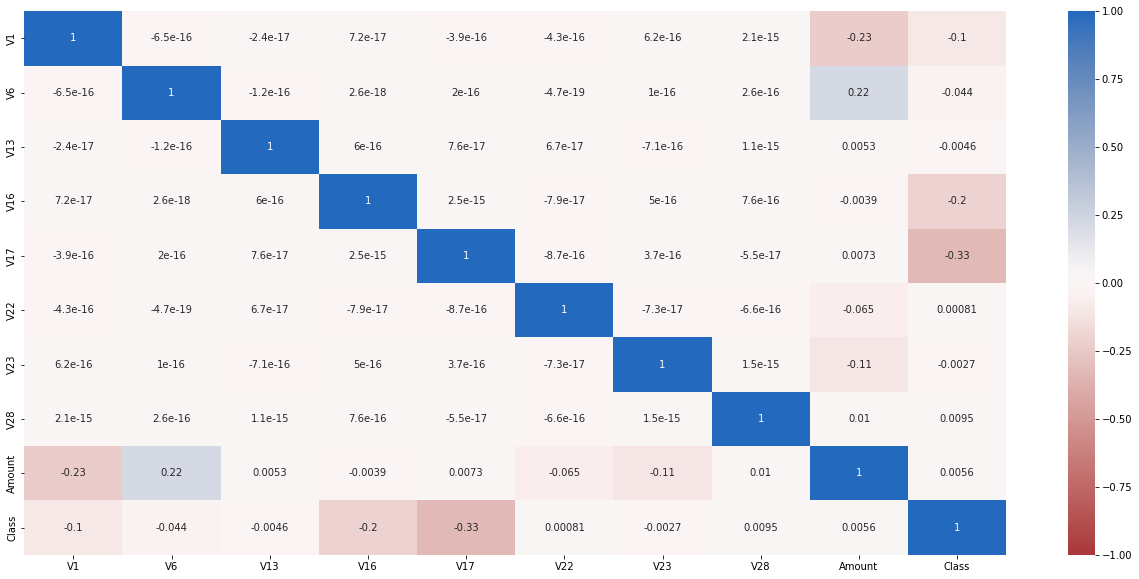

In [206]:
_, ax = plt.subplots(figsize=(22,10))
sns.heatmap(data_2.corr(), annot = True, cmap = 'vlag_r', vmin = -1, vmax = 1,  ax = ax) 
# PCA was performed on V1, ..., V28 in fact all the covariances are very near to 0.
# Only Time and Amount were not trasformed through PCA and so they have some covariance value
# different from 0. It is possible to see that the Class, that represents the feature we want to
# predict has negative coorelation with some features like V16 and V17.

# Data normalization

Definition of the min-max scaling method.

In [207]:
def min_max(data, data_min=None, data_max=None):
  '''
  Applies the min-max scaling method to a numpy dataset

  Parameters
  ----------
  data: ndarray
    dataset to scale with samples on rows
  data_min: ndarray, optional
    array containing the min value for each feature
  data_max: ndarray, optional
    array containing the max value for each feature

  Returns
  -------
  data_normalized: ndarray
    original dataset but normalized
  data_min: ndarray
    array containing the min value for each feature
  data_max: ndarray
    array containing the max value for each feature
  '''

  if data_min is None or data_max is None:
    data_min = data.min(axis=0)
    data_max = data.max(axis=0)

  data_normalized = (data - data_min[None,:]) / (data_max[None,:] - data_min[None,:]) 
  return data_normalized, data_min, data_max

# Train-validation split

Definition of the function splitting data into training, validation and test set.


In [208]:
def train_split(data_input, percentage_train=0.7, percentage_validation=0.0):
  '''
  Shuffles the dataset and splits in train, validation and test

  Parameters
  ----------
  data_input: ndarray
    dataset to split with samples on rows
  percentage_train: float, optional
    percentage of data to put in the train dataset
  percentage_validation: float, optional
    percentage of data to put in the validation dataset

  Returns
  -------
  x_train: ndarray
    train dataset with samples
  y_train: ndarray
    train dataset with labels
  x_valid: ndarray
    validation dataset with samples
  y_valid: ndarray
    validation dataset with labels
  x_test: ndarray
    test dataset with samples
  y_test: ndarray
    test dataset with labels

  Raises
  ------
  Exception: if the sum of the two percentages is greater than 1 or at least 
              one of them is negative
  '''

  # Check validity of the parameters
  if percentage_train + percentage_validation > 1 or percentage_train < 0 or\
    percentage_validation < 0:
    raise Exception('Percentages must be positive and their sum must be lower \
                    or equal to 1')
    
  data = data_input.copy()

  np.random.seed(0) # For reproducibility
  np.random.shuffle(data) # Shuffle along first axis, so rows

  # Take the number of samples to put in each dataset
  num_train = int(data.shape[0] * percentage_train) 
  num_val = num_train + int(data.shape[0] * percentage_validation) 

  # Split the dataset
  x_train = data[:num_train, :-1] # Don't take last column that is the class
  y_train = data[:num_train, -1:]
  x_valid = data[num_train:num_val, :-1]
  y_valid = data[num_train:num_val, -1:]
  x_test =  data[num_val:, :-1] 
  y_test =  data[num_val:, -1:]

  return x_train, y_train, x_valid, y_valid, x_test, y_test

# Undersampling

Definition of the function doing undersampling on data.

In [209]:
# Undersample the majority class, this will create a balanced dataset, 
# allowing the classifier to better distinguish between the two classes.

def undersample(x, y, ratio):
  '''
  Performs undersampling on the dataset

  Parameters
  ----------
  x: ndarray
    dataset to undersample with samples on 
  y: ndarray
    corresponding labels of the dataset to undersample
  ratio: float
    desired ratio of samples between majority and minority class.
    It assumes that label '1' is the minority class

  Returns
  -------
  x[idxs, :]: ndarray
    dataset undersampled with samples
  y[idxs, :]: ndarray
    corresponding labels of the undersampled dataset
  '''

  # Take indexes corresponding to labels '0' and '1'
  idxs_zeros = np.where(y == 0.)[0]
  idxs_ones = np.where(y == 1.)[0]

  # Compute the number of samples of the majority class to keep
  n_samples = int(len(idxs_ones) * ratio)

  # Extract randomly the samples from the majority class
  idxs_zeros = np.random.choice(idxs_zeros, min(n_samples, len(idxs_zeros)), replace = False)
  
  # Extract the undersampled dataset
  idxs = np.concatenate((idxs_zeros, idxs_ones))
  return x[idxs, :], y[idxs, :]

# Metrics

Definition of the function computing the metrics.

In [210]:
# Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

def metrics(predictions, true_labels, metrics_df=None, dataset_label='NotLabeled'):
  """
  Computes and print metrics TP, TN, FP, FN, AC, RC, PC, F1

  Parameters
  ----------
  predictions: ndarray
    predictions of samples obtained with a model
  true_labels: ndarray
    true labels of the samples
  metrics_df: DataFrame, optional
    DataFrame to which the computed statistics have to be put
  dataset_label: str, optional
    label identifing the belonging of the statistcs to its dataset

  Returns
  -------
  DataFrame
    DataFrame containing the statistics contained in the parameter metrics_df
    plus the statistics computed on the new predictions
  """

  TP = np.sum(np.logical_and(predictions == 1., true_labels == 1.)) # Attacks accurately flagged as attacks
  TN = np.sum(np.logical_and(predictions == 0., true_labels == 0.)) # Normal traffic accurately flagged as normal
  FP = np.sum(np.logical_and(predictions == 1., true_labels == 0.)) # Normal traffic incorrectly flagged as attacks
  FN = np.sum(np.logical_and(predictions == 0., true_labels == 1.)) # Attacks incorrectly flagged as normal 

  AC = ((TN + TP) / len(predictions)) * 100 # Accuracy
  RC = (TP / (FN + TP)) * 100 # Recall or sensitivity
  PR = (TP / (FP + TP)) * 100 # Precision
  F1 = 2 * PR * RC / (PR + RC) # F1-Score

  if metrics_df is None:
    columns = ['Set of features', 'TP', 'TN', 'FP', 'FN', 'accuracy', 'recall', 'precision', 'F1-score']
    metrics_df = pd.DataFrame([[dataset_label, TP, TN, FP, FN, AC, RC, PR, F1]], columns=columns)
  else:
    columns = ['Set of features', 'TP', 'TN', 'FP', 'FN', 'accuracy', 'recall', 'precision', 'F1-score']
    metrics_df = metrics_df.append(pd.DataFrame([[dataset_label, TP, TN, FP, FN, AC, RC, PR, F1]], columns=columns))
  
  return metrics_df

In [211]:
# To save the metrics obatined on the test set by all classifiers
metrics_per_classifier = list()

# To plot ROC curve of all classifiers for each dataset
ROC_curves_per_classifier = list()

# Logistic regression

## Functions definition

In [212]:
def sigmoid(x, weights, bias):
  '''
  Predicts output values using logistic regression

  Parameters
  ----------
  x: ndarray
    samples
  weights: ndarray
    weights of the logistic regression model
  bias: float
    bias of the logistic regression model

  Returns
  -------
  predictions: ndarray
    array with values of the samples predicted with the given model
  '''
  return 1. / (1. + jnp.exp(-(bias + x @ weights)))
  
def cross_entropy(x, y, weights, bias):
  '''
  Cross entropy cost function

  Parameters
  ----------
  x: ndarray
    samples
  y: ndarray
    true labels associated to samples
  weights: ndarray
    weights of the model
  bias: float
    bias of the model

  Returns
  -------
  ndarray
    the value of the cost function with the given input
  '''

  # Compute prediction
  y_pred = sigmoid(x, weights, bias)
  # Compute loss
  # penalize more error on frauds not detected, so the model pays more attention to this minority class
  return - jnp.mean(2. * y * jnp.log(y_pred) + 0.5 * (1-y) * jnp.log(1-y_pred)) 

# Gradient computation and jit compilation of the cost function
grad = jax.grad(cross_entropy, argnums = [2,3])
grad_jit = jax.jit(grad)
cross_entropy_jit = jax.jit(cross_entropy)

In [213]:
def SGD(x_train, y_train, x_valid=None, y_valid = None, num_epochs=25000, learning_rate_max=1e-1, \
        learning_rate_min = 1e-3, learning_rate_decay = 25000, batch_size = 4):
  '''
  SGD method with mini-batch and learning rate decay

  Parameters
  ----------
  x_train: ndarray
    train dataset with samples on rows
  y_train: ndarray
    train labels
  x_valid: ndarray, optional
    validation dataset with samples on rows
  y_valid: ndarray, optional
    validation labels
  num_epochs: int, optional
    number of epochs to perform (default is 50000)
  learning_rate_max: float, optional
    max value of the learning rate (default is 1e-1)
  learning_rate_min: float, optional
    min value of the learning rate (default is 1e-3)
  learning_rate_decay: int, optional
    number of epochs to reach the learning_rate_min (default is 50000)
  batch_size: int, optional
    size of the batch (default is 32)

  Returns
  -------
  weights: ndarray
    computed weights of the model
  bias: float
    computed bias of the model
  history: list
    list with the history of the cost function values on training dataset
  '''

  # Check if there is a validation dataset
  validation = True if x_valid is not None and y_valid is not None else False

  # Initialize weights and bias
  weights = np.random.randn(x_train.shape[1], 1) 
  bias = 0.0

  # Initialize history of the cost function
  history = list()
  history.append(cross_entropy_jit(x_train, y_train, weights, bias))
  if validation:
    history_valid = list()
    history_valid.append(cross_entropy_jit(x_valid, y_valid, weights, bias))

  for epoch in tqdm(range(num_epochs)):  
    # Take indexes of the batch
    idxs = np.random.choice(x_train.shape[0], batch_size) 

    # Compute gradient
    grads = grad_jit(x_train[idxs,:], y_train[idxs,:], weights, bias)
    
    # Compute learning rate value
    learning_rate = max(learning_rate_min, learning_rate_max * (1 - epoch/learning_rate_decay))
    
    # Update weights and bias
    weights -= learning_rate * grads[0]
    bias -= learning_rate * grads[1]

    # Compute value of the cost function on entire dataset, it is done periodically because
    # if the dataset is big, this operation slows down too much the function
    if epoch % 10 == 0:
      history.append(cross_entropy_jit(x_train, y_train, weights, bias)) 
      if validation:
        history_valid.append(cross_entropy_jit(x_valid, y_valid, weights, bias))

  return weights, bias, history

In [214]:
def predict_LR(x, weights, bias):
  '''
  Predicts labels using logistic regression

  Parameters
  ----------
  x: ndarray
    samples
  weights: ndarray
    weights of the logistic regression model
  bias: float
    bias of the logistic regression model

  Returns
  -------
  predictions: ndarray
    array with labels of the samples predicted with the given model
  '''

  # Predict output of samples with the model
  y_pred = sigmoid(x, weights, bias)

  # Link the predicted output to the label
  predictions = np.array([0. if pred < 0.5 else 1. for pred in y_pred])[:, None] 
  return predictions

## Testing LR

  0%|          | 0/25000 [00:00<?, ?it/s]

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v5 training,174,16849,1,163,99.045790,51.632047,99.428571,67.968750
v5 test,75,85279,9,80,99.895837,48.387097,89.285714,62.761506


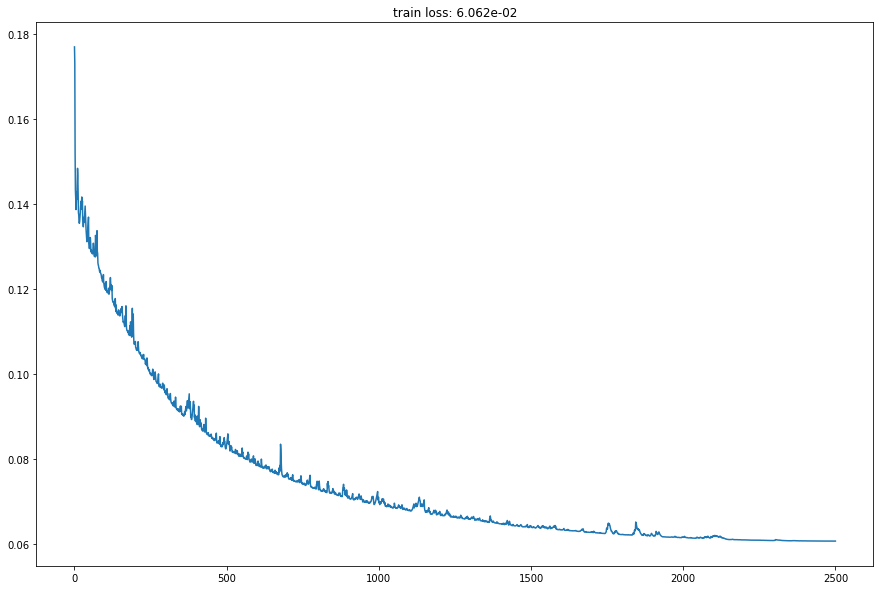

In [215]:
# Test LR on a single dataset

# Set up the dataset
data_np = data_5.to_numpy()
x_train, y_train, _, _, x_test, y_test = train_split(data_np, percentage_train=0.7, percentage_validation=0.0)
x_train, data_train_min, data_train_max = min_max(x_train, None, None)
x_train, y_train = undersample(x_train, y_train, 50.)

# Train model
weights, bias, history = SGD(x_train, y_train) 

# Plot history of the values of loss function
plt.plot(history)
plt.title('train loss: %1.3e' % history[-1])

# Get predictions with the trained model
predictions = predict_LR(x_train, weights, bias)

# Compute metrics on train test
metrics_train = metrics(predictions, y_train, dataset_label='v5'+' training')
  
# Normalizing the test set
x_test, _, _ = min_max(x_test, data_train_min, data_train_max)

# Get predictions with the trained model
predictions = predict_LR(x_test, weights, bias) 

# Compute metrics
metrics(predictions, y_test, metrics_df=metrics_train, dataset_label='v5'+' test').style.hide_index()

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

Text(0, 0.5, 'True Positive Rate')

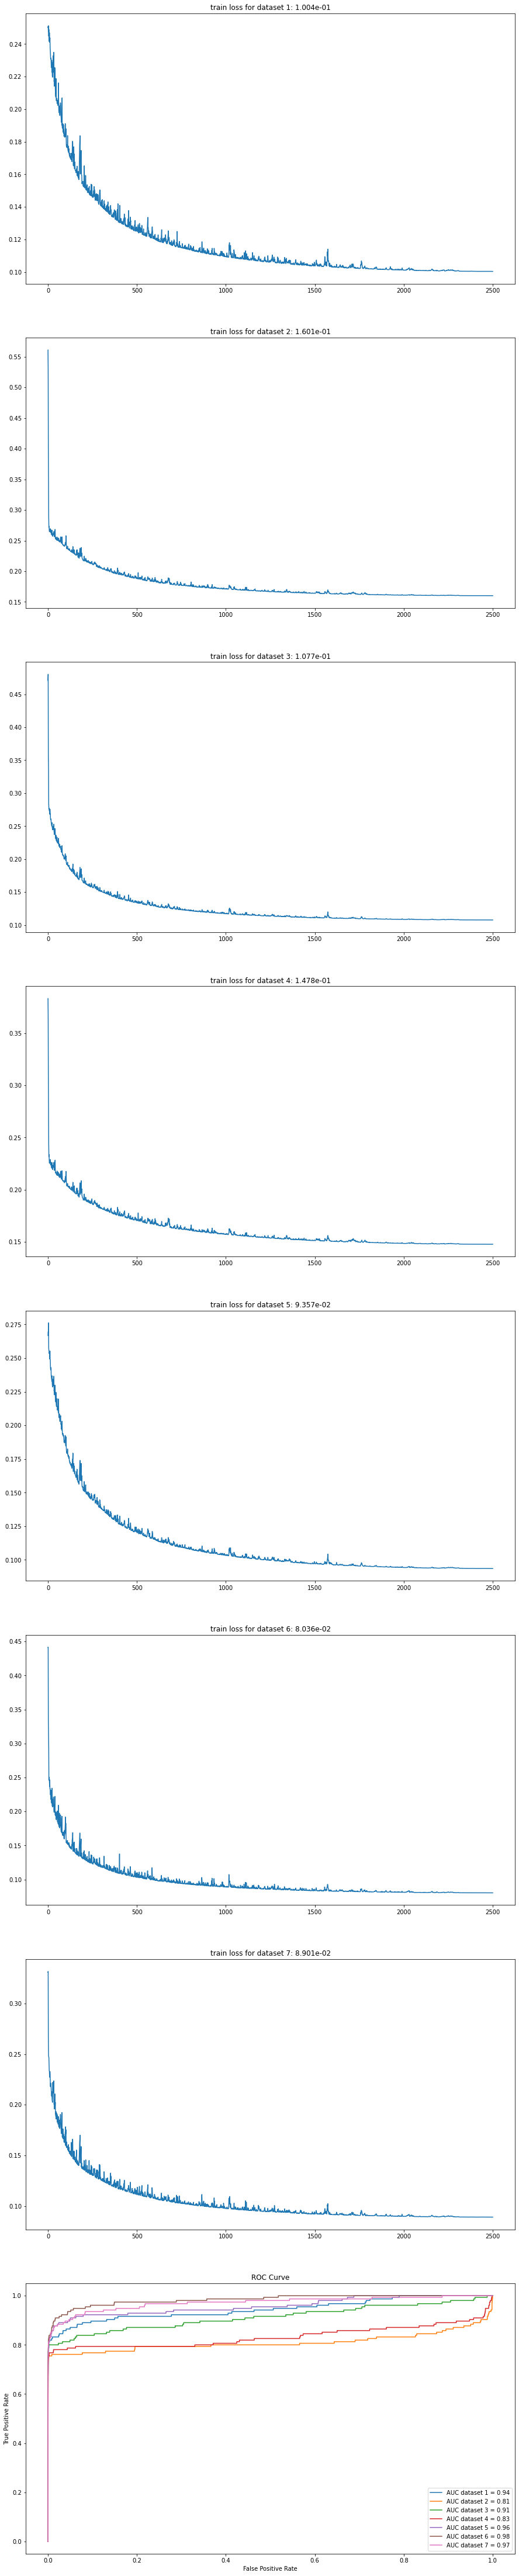

In [216]:
# Testing LR on all datasets 
datasets = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]
fig, axs = plt.subplots(8,1,figsize = (15,80)) 
metrics_train_set = None
metrics_test_set = None
weights_list = list()
bias_list = list()
ROC_curves = dict()

# Train the classifiers
for i, dataset in enumerate(datasets):
  # Pre-processing the dataset
  dataset_np = dataset.to_numpy()

  # Splitting train set and test set
  x_train, y_train, _, _, x_test, y_test = train_split(dataset_np, percentage_train=0.7, percentage_validation=0.0)
  
  # Normalizing the training set
  x_train, data_train_min, data_train_max = min_max(x_train, None, None)
  
  # Undersampling the training set
  x_train, y_train = undersample(x_train, y_train, 20.)

  # Train model
  # using default values so num_epochs=25000, learning_rate_max=1e-1, 
  # learning_rate_min = 1e-3, learning_rate_decay = 25000, batch_size = 4
  weights, bias, history = SGD(x_train, y_train) 

  # Save the model
  weights_list.append(weights)
  bias_list.append(bias)
  
  # Plot training history of the values of loss function
  axs[i].plot(history)
  axs[i].set_title('train loss for dataset %d: %1.3e' % (i+1, history[-1]))

  # Get predictions with the trained model on train set
  predictions = predict_LR(x_train, weights, bias) 
  
  # Compute metrics on train test
  metrics_train_set = metrics(predictions, y_train, metrics_df=metrics_train_set, dataset_label='v'+str(i+1)+' training')
   
  # Normalizing the test set
  x_test, _, _ = min_max(x_test, data_train_min, data_train_max)

  # Get predictions with the trained model on test set
  predictions = predict_LR(x_test, weights, bias) 

  # Compute metrics on test set
  metrics_test_set = metrics(predictions, y_test, metrics_df=metrics_test_set, dataset_label='v'+str(i+1)+' test')

  # Compute ROC and AUC
  y_pred = sigmoid(x_test, weights, bias)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)

  # Plot the ROC curve
  axs[-1].plot(fpr, tpr, label='AUC dataset %d = %0.2f' % (i+1, roc_auc))
  
  # Save the ROC curve
  ROC_curves[i] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Save all the ROC curves for this classifier to plot them in the end
ROC_curves_per_classifier.append(ROC_curves)

axs[-1].set_title('ROC Curve')
axs[-1].legend(loc='lower right')
axs[-1].set_xlabel('False Positive Rate')
axs[-1].set_ylabel('True Positive Rate')

In [217]:
# Displaying the metrics for the train set
metrics_train_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 training,243,6739,1,94,98.657623,72.106825,99.590164,83.648881
v2 training,133,6739,1,204,97.103292,39.465875,99.253731,56.475584
v3 training,231,6738,2,106,98.473930,68.545994,99.141631,81.052632
v4 training,149,6739,1,188,97.329377,44.213650,99.333333,61.190965
v5 training,237,6738,2,100,98.558711,70.326409,99.163180,82.291667
v6 training,261,6737,3,76,98.883708,77.448071,98.863636,86.855241
v7 training,247,6738,2,90,98.700014,73.293769,99.196787,84.300341


In [218]:
# Save the metrics
metrics_per_classifier.append(metrics_test_set)

# Displaying the metrics for the test set
metrics_test_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 test,110,85253,35,45,99.906370,70.967742,75.862069,73.333333
v2 test,60,85278,10,95,99.877111,38.709677,85.714286,53.333333
v3 test,95,85273,15,60,99.912222,61.290323,86.363636,71.698113
v4 test,70,85279,9,85,99.889985,45.161290,88.607595,59.829060
v5 test,110,85252,36,45,99.905200,70.967742,75.342466,73.089701
v6 test,118,85248,40,37,99.909881,76.129032,74.683544,75.399361
v7 test,112,85266,22,43,99.923926,72.258065,83.582090,77.508651


# Decision tree

## Decision tree model definition

In [219]:
class Node: 
  '''
  Class representing a node in a DecisionTree

  Attributes
  ----------
  feature: int
    feature associated to the node
  threshold: float
    threshold associated to the feature
  left: Node
    left child of the node
  right: Node
    right child of the node
  value: float
    label associated to the node, if leaf

  Methods
  -------
  is_leaf: tell if a Node is a leaf or not
  '''
 
  def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
    '''
    Parameters
    ----------
    feature: int, optional
      feature associated to the node (default is None)
    threshold: float, optional
      threshold associated to the feature (default is None)
    left: Node, optional
      left child of the node (default is None)
    right: Node, optional
      right child of the node (default is None)
    value: float, optional
      label associated to the node, if leaf (default is None)

    Returns
    -------
    Node
      node created
    '''

    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

  def is_leaf(self):
    '''
    Tells if the node is a leaf
    '''

    return self.value is not None


class DecisionTree:
  '''
  Class representing a decision tree

  Attributes
  ----------
  max_depth: int
    max depth of a tree
  n_features: int
    number of features to evaluate while branching to build a tree
  max_number_thresholds: int
    max number of thresholds to evaluate while branching to build a tree
  min_samples: int
    min number of samples in a node to branch when building a tree
  root: Node
    root of the tree
  mode: str
      mode to compute the information gain, it can be 'gini' or 'entropy'
  
  Methods
  -------
  train: to train a decision tree model
  predict: to make predictions using the built model
  '''

  def __init__(self, max_depth=10, n_features=None, max_number_thresholds=np.inf, min_samples=2, mode='gini'):
    '''
    Parameters
    ----------
    max_depth: int, optional
      max depth of a tree (default is 10)
    n_features: int, optional
      number of features to evaluate while branching to build a tree (default is None)
    max_number_thresholds: int, optional
      max number of thresholds to evaluate while branching to build a tree (default is np.inf)
    min_samples: int, optional
      min number of samples in a node to branch when building a tree (default is 2)
    mode: str, optional
      mode to compute the information gain, it can be 'gini' or 'entropy' (default is 'gini')

    Returns
    -------
    DecisionTree
      decision tree model created
    
    '''

    self.max_depth = max_depth 
    self.n_features = n_features 
    self.max_number_thresholds = max_number_thresholds 
    self.min_samples = min_samples  
    self.root = None
    self.mode = mode

  def train(self, x, y):
    '''
    Builds the tree

    Parameters
    ----------
    x: ndarray
      train dataset with samples on rows 
    y: ndarray
      labels associated to the dataset
    '''

    if self.n_features is None or self.n_features > x.shape[1]:
      self.n_features = x.shape[1] 
    self.root = self.build_tree(x, y)
      
  def build_tree(self, x, y, depth=0):
    '''
    Builds the tree recursively and returns the root

    Parameters
    ----------
    x: ndarray
      train dataset with samples on rows
    y: ndarray
      labels associated to the dataset
    depth: int, optional
      current depth of the tree

    Returns
    -------
    Node
      the root of the built tree
    '''

    num_samples, num_features = x.shape
    num_values = len(np.unique(y)) # Get number of different values in y 

    # Check the stopping criteria, if so create a leaf node
    if depth >= self.max_depth or num_samples < self.min_samples or num_values <= 1:
      return Node(value = self.get_label(y))

    # Randomly select the features to evaluate
    features = np.random.choice(num_features, self.n_features, replace=False)

    # To select the best branch
    max_gain = -1
    branch_threshold = None
    branch_feature = None

    # Evaluate all selected features
    for feature in features:
      # Randomly select the thresholds to evaluate
      thresholds = np.random.choice(np.unique(x[:, feature]), 
                                    min(self.max_number_thresholds, len(np.unique(x[:, feature]))), replace=False)

      # Evaluate all selected thresholds
      for threshold in thresholds:
        # Compute the information gain
        gain = self.information_gain(x[:, feature], y, threshold)

        # Check if it is the best gain
        if gain > max_gain:
          max_gain = gain
          branch_threshold = threshold
          branch_feature = feature

    # Build left branch
    left_idxs = x[:, branch_feature] <= branch_threshold
    left = self.build_tree(x[left_idxs, :], y[left_idxs, :], depth+1)

    # Build right branch
    right_idxs = x[:, branch_feature] > branch_threshold
    right = self.build_tree(x[right_idxs, :], y[right_idxs, :], depth+1)

    return Node(branch_feature, branch_threshold, left, right)
        
  def information_gain(self, x, y, threshold):
    '''
    Computes the information gain using gini or entropy

    Parameters
    ----------
    x: ndarray
      train dataset with samples on rows
    y: ndarray
      labels associated to the dataset
    threshold: float
      threshold to divide the samples
    
    Returns
    -------
    float
      the value of the information gain 
    '''

    # Take indexes of left and right children
    left_idxs = x <= threshold
    right_idxs = x > threshold

    # If one of the children is empty nothing is changing, so the gain is 0
    if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
      return 0.

    # Compute the weights of the children
    weight_left = np.sum(left_idxs) / len(y)
    weight_right = np.sum(right_idxs) / len(y)

    # Compute information gain based on the mode
    if self.mode == 'gini':
      return self.gini(y) - (weight_left * self.gini(y[left_idxs, :]) + weight_right * self.gini(y[right_idxs, :]))
    elif self.mode == 'entropy':
      return self.entropy(y) - (weight_left * self.entropy(y[left_idxs, :]) + weight_right * self.entropy(y[right_idxs, :]))

  def gini(self, y):
    '''
    Computes the gini index of a vector of labels

    Parameters
    ----------
    y: ndarray
      vector of labels containing values 0. or 1.

    Returns
    -------
    float
      the value of the gini index
    '''

    # Compute probability of having 1. and 0.
    p_ones = np.sum(y) / len(y)
    p_zeros = 1. - p_ones

    # Compute gini index
    return 1. - (p_zeros**2 + p_ones**2)

  # Using gini would not require the logarithm, more efficient
  def entropy(self, y): 
    '''
    Computes the entropy of a vector of labels

    Parameters
    ----------
    y: ndarray
      vector of labels containing values 0. or 1. 

    Returns
    -------
    float
      the entropy of the vector
    '''

    # Compute probability of having 1. and 0.
    p_ones = np.sum(y) / len(y)
    p_zeros = 1. - p_ones

    # Compute entropy
    # To avoid computing logarithm of 0.
    if p_ones == 0. or  p_zeros == 0.:
      return 0
    return -(p_zeros * np.log2(p_zeros) + p_ones * np.log2(p_ones))

  def get_label(self, y):
    '''
    Finds the most common label in a vector

    Parameters
    ----------
    : ndarray
      vector of labels containing values 0. or 1.

    Returns
    -------
    float
      the value of the most common label
    '''

    ones = np.sum(y)
    zeros = len(y) - ones
    return 1. if ones >= zeros else 0.

  def predict(self, x):
    '''
    Returns the predictions on the input dataset

    Parameters
    ----------
    x: ndarray
      test dataset with samples on rows

    Returns
    -------
    ndarray
      predicted labels
    '''
    
    # Compute prediction for each sample of the input
    return np.array([self.get_prediction(sample, self.root) for sample in x])[:,None] # Return a column vector

  def get_prediction(self, x, node):
    '''
    Recursively traverse the tree to make a prediction

    Parameters
    ----------
    x: ndarray
      sample to predict
    node: Node
      current node of the tree

    Returns
    -------
    float
      predicted label
    '''

    # If the node is a leaf return the prediction
    if node.is_leaf():
      return node.value
    
    # If the value of the sample corresponding to the feature of the node 
    # is less than the threshold of the node go left, otherwise go right
    if x[node.feature] <= node.threshold:
      return self.get_prediction(x, node.left)
    else:
      return self.get_prediction(x, node.right)

## Testing DT

In [220]:
# Test DT on a single dataset

# Set up the dataset
data_np = data_5.to_numpy()
x_train, y_train, _, _, x_test, y_test = train_split(data_np, percentage_train=0.7, percentage_validation=0.0)
x_train, data_train_min, data_train_max = min_max(x_train, None, None)

# Train model
# higher max_threshold or n_features performs better but takes more time to train
classifier = DecisionTree(max_depth=7, n_features=3, max_number_thresholds=20, min_samples=5)
classifier.train(x_train, y_train)

# Get predictions with the trained model
predictions = classifier.predict(x_train)

# Compute metrics on train test
metrics_train = metrics(predictions, y_train, dataset_label='v5'+' training')

# Normalizing the test set
x_test, _, _ = min_max(x_test, data_train_min, data_train_max)

# Get predictions with the trained model
predictions = classifier.predict(x_test)

# Compute metrics
metrics(predictions, y_test, metrics_df=metrics_train, dataset_label='v5'+' test').style.hide_index() 

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v5 training,271,199009,18,66,99.957866,80.415430,93.771626,86.581470
v5 test,114,85262,26,41,99.921585,73.548387,81.428571,77.288136


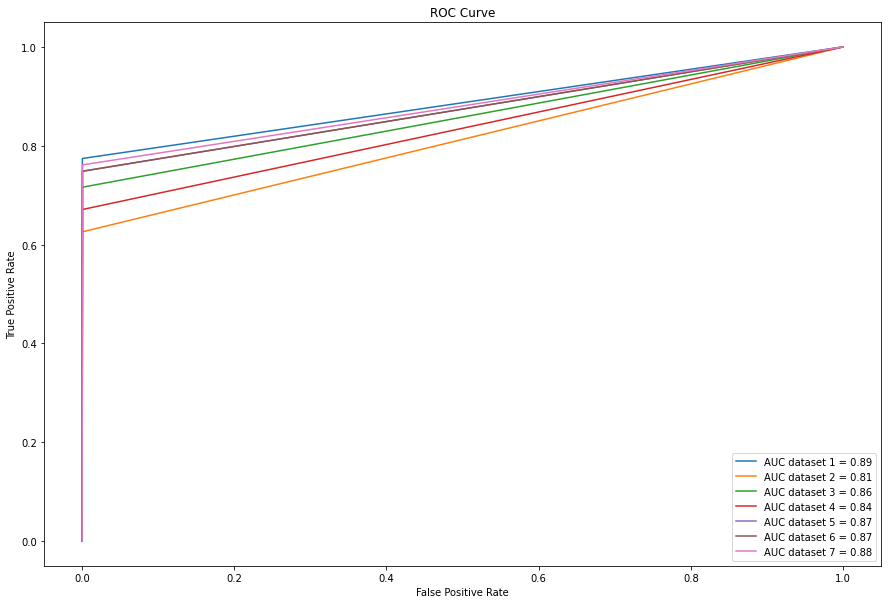

In [221]:
# Testing DT on all datasets 
datasets = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]
metrics_train_set = None
metrics_test_set = None
classifiers = list()
ROC_curves = dict()

for i, dataset in enumerate(datasets):
  # Pre-processing the dataset
  dataset_np = dataset.to_numpy()

  # Splitting train set and test set
  x_train, y_train, _, _, x_test, y_test = train_split(dataset_np, percentage_train=0.7, percentage_validation=0.0)
  
  # Normalizing the training set
  x_train, data_train_min, data_train_max = min_max(x_train, None, None)
  
  # Undersampling the training set
  x_train, y_train = undersample(x_train, y_train, 200.)

  # Train model
  classifier = DecisionTree(max_depth=7, n_features=int(x_train.shape[1]/2), max_number_thresholds=50) 
  classifier.train(x_train, y_train)

  # Save the model
  classifiers.append(classifier)

  # Get predictions with the trained model on train set
  predictions = classifier.predict(x_train)

  # Compute metrics on train set
  metrics_train_set = metrics(predictions, y_train, metrics_df=metrics_train_set, dataset_label='v'+str(i+1)+' training')
  
  # Normalizing the test set
  x_test, _, _ = min_max(x_test, data_train_min, data_train_max)

  # Get predictions with the trained model on test set
  predictions = classifier.predict(x_test)

  # Compute metrics on test set
  metrics_test_set = metrics(predictions, y_test, metrics_df=metrics_test_set, dataset_label='v'+str(i+1)+' test')

  # Compute ROC and AUC
  fpr, tpr, _ = roc_curve(y_test, predictions)
  roc_auc = auc(fpr, tpr)

  # Plot the ROC curve
  plt.plot(fpr, tpr, label='AUC dataset %d = %0.2f' % (i+1, roc_auc))

  # Save the ROC curve
  ROC_curves[i] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Save all the ROC curves for this classifier to plot them in the end
ROC_curves_per_classifier.append(ROC_curves)

plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [222]:
# Displaying the metrics for the train set
metrics_train_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 training,277,67398,2,60,99.908470,82.195846,99.283154,89.935065
v2 training,233,67398,2,104,99.843512,69.139466,99.148936,81.468531
v3 training,270,67393,7,67,99.890754,80.118694,97.472924,87.947883
v4 training,264,67394,6,73,99.883372,78.338279,97.777778,86.985173
v5 training,284,67399,1,53,99.920280,84.272997,99.649123,91.318328
v6 training,291,67398,2,46,99.929138,86.350148,99.317406,92.380952
v7 training,281,67389,11,56,99.901088,83.382789,96.232877,89.348172


In [223]:
# Save the metrics
metrics_per_classifier.append(metrics_test_set)

# Displaying the metrics for the test set
metrics_test_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 test,120,85260,28,35,99.926267,77.419355,81.081081,79.207921
v2 test,97,85260,28,58,99.899348,62.580645,77.600000,69.285714
v3 test,111,85252,36,44,99.906370,71.612903,75.510204,73.509934
v4 test,104,85250,38,51,99.895837,67.096774,73.239437,70.033670
v5 test,116,85259,29,39,99.920415,74.838710,80.000000,77.333333
v6 test,116,85244,44,39,99.902859,74.838710,72.500000,73.650794
v7 test,118,85239,49,37,99.899348,76.129032,70.658683,73.291925


# Random forest

## Random forest model definition

In [224]:
class RandomForest:
  '''
  Class representing a random forest

  Attributes
  ----------
  n_trees: int 
    number of trees in the forest
  max_depth: int 
    max depth of a tree
  n_features: int
    number of features to evaluate while branching to build a tree
  max_number_thresholds: int
    max number of thresholds to evaluate while branching to build a tree
  min_samples: int
    min number of samples in a node to branch when building a tree
  trees: list
    list with all the trees

  Methods
  -------
  train: to train a random forest model
  predict: to make predictions using the built model
  '''

  def __init__(self, n_trees=20, max_depth=10, n_features=None, max_number_thresholds=np.inf, min_samples=2):
    '''
    Parameters
    ----------
    n_trees: int, optional
      number of trees in the forest (default is 50)
    max_depth: int, optional
      max depth of a tree (default is 10)
    n_features: int, optional
      number of features to evaluate while branching to build a tree (default is None)
    max_number_thresholds: int, optional
      max number of thresholds to evaluate while branching to build a tree (default is np.inf)
    min_samples: int, optional
      min number of samples in a node to branch when building a tree (default is 2)

    Returns
    -------
    RandomForest
      random forest model created
    '''

    self.n_trees = n_trees
    self.max_depth = max_depth 
    self.n_features = n_features 
    self.max_number_thresholds = max_number_thresholds 
    self.min_samples = min_samples
    self.trees = []
  
  def train(self, x, y):
    '''
    Builds the forest

    Parameters
    ----------
    x: ndarray
      train dataset with samples on rows 
    y: ndarray
      labels associated to the dataset
    ''' 

    for i in tqdm(range(self.n_trees)):
      # Create bootstrapped dataset
      n_samples = x.shape[0]
      idxs = np.random.choice(n_samples, n_samples, replace=True) # With replacement
      
      # Train a tree
      tree = DecisionTree(self.max_depth, self.n_features, self.max_number_thresholds, self.min_samples)
      tree.train(x[idxs, :], y[idxs, :])
      self.trees.append(tree)

  def predict(self, x):
    '''
    Returns the predictions by majority vote

    Parameters
    ----------
    x: ndarray
      test dataset with samples on rows

    Returns
    -------
    majorities: ndarray
      predicted labels
    '''

    # Make predictions for each tree 
    votes = np.array([tree.predict(x) for tree in self.trees])
    
    # Compute majority 
    majorities = np.mean(votes, axis=0)
    
    # Associate the labels
    majorities[majorities >= 0.5] = 1.
    majorities[majorities < 0.5] = 0.
    return majorities, votes

## Testing RF

In [225]:
# Test RF on a single dataset

# Set up the dataset
data_np = data_5.to_numpy()
x_train, y_train, _, _, x_test, y_test = train_split(data_np, percentage_train=0.7, percentage_validation=0.0)
x_train, data_train_min, data_train_max = min_max(x_train, None, None)
x_train, y_train = undersample(x_train, y_train, 50.)

# Train model
classifier = RandomForest(n_trees=20, max_depth=5, n_features=3, max_number_thresholds=50) 
classifier.train(x_train, y_train)

# Get predictions with the trained model
predictions,_ = classifier.predict(x_train)

# Compute metrics on train test
metrics_train = metrics(predictions, y_train, dataset_label='v5'+' training')

# Normalizing the test set
x_test, _, _ = min_max(x_test, data_train_min, data_train_max)

# Get predictions with the trained model
predictions,_ = classifier.predict(x_test)

# Compute metrics
metrics(predictions, y_test, metrics_df=metrics_train, dataset_label='v5'+' test').style.hide_index() 

  0%|          | 0/20 [00:00<?, ?it/s]

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v5 training,268,16849,1,69,99.592715,79.525223,99.628253,88.448845
v5 test,117,85263,25,38,99.926267,75.483871,82.394366,78.787879


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

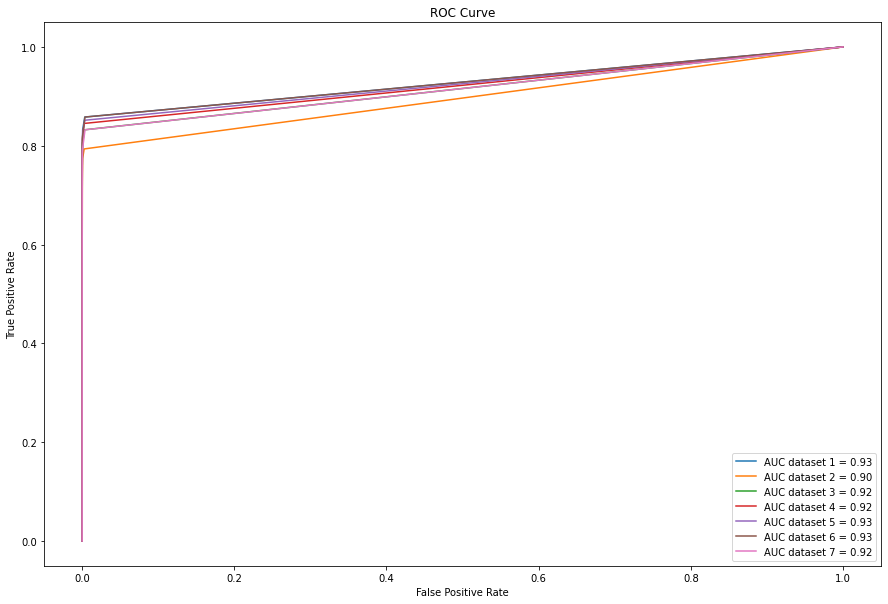

In [226]:
# Testing RF on all datasets 
datasets = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]
metrics_train_set = None
metrics_test_set = None
classifiers = list()
ROC_curves = dict()

for i, dataset in enumerate(datasets):
  # Pre-processing the dataset
  dataset_np = dataset.to_numpy()

  # Splitting train set and test set
  x_train, y_train, _, _, x_test, y_test = train_split(dataset_np, percentage_train=0.7, percentage_validation=0.0)
  
  # Normalizing the training set
  x_train, data_train_min, data_train_max = min_max(x_train, None, None)
  
  # Undersampling the training set
  x_train, y_train = undersample(x_train, y_train, 200.)

  # Train model
  # Slightly better with 20 trees, but the training time doubles
  classifier = RandomForest(n_trees=10, max_depth=7, n_features=3, max_number_thresholds=50)  # better with 20 trees instead of 50
  classifier.train(x_train, y_train)

  # Save the model
  classifiers.append(classifier)

  # Get predictions with the trained model on train set
  predictions, _ = classifier.predict(x_train)

  # Compute metrics on train test
  metrics_train_set = metrics(predictions, y_train, metrics_df=metrics_train_set, dataset_label='v'+str(i+1)+' training')
  
  # Normalizing the test set
  x_test, _, _ = min_max(x_test, data_train_min, data_train_max)

  # Get predictions with the trained model
  predictions, votes = classifier.predict(x_test)

  # Compute metrics on test set
  metrics_test_set = metrics(predictions, y_test, metrics_df=metrics_test_set, dataset_label='v'+str(i+1)+' test')
   
  # Compute majority 
  majorities = np.mean(votes, axis=0)

  # Compute ROC and AUC
  fpr, tpr, _ = roc_curve(y_test, majorities)
  roc_auc = auc(fpr, tpr)

  # Plot the ROC curve
  plt.plot(fpr, tpr, label='AUC dataset %d = %0.2f' % (i+1, roc_auc))

  # Save the ROC curve
  ROC_curves[i] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Save all the ROC curves for this classifier to plot them in the end
ROC_curves_per_classifier.append(ROC_curves)
  
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [227]:
# Displaying the metrics for the train set
metrics_train_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 training,270,67390,10,67,99.886325,80.118694,96.428571,87.520259
v2 training,264,67387,13,73,99.873038,78.338279,95.306859,85.993485
v3 training,275,67395,5,62,99.901088,81.602374,98.214286,89.141005
v4 training,272,67391,9,65,99.890754,80.712166,96.797153,88.025890
v5 training,275,67395,5,62,99.901088,81.602374,98.214286,89.141005
v6 training,271,67394,6,66,99.893707,80.415430,97.833935,88.273616
v7 training,274,67389,11,63,99.890754,81.305638,96.140351,88.102894


In [228]:
# Save the metrics
metrics_per_classifier.append(metrics_test_set)

# Displaying the metrics for the test set
metrics_test_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 test,117,85270,18,38,99.934459,75.483871,86.666667,80.689655
v2 test,111,85265,23,44,99.921585,71.612903,82.835821,76.816609
v3 test,119,85270,18,36,99.936800,76.774194,86.861314,81.506849
v4 test,113,85268,20,42,99.927437,72.903226,84.962406,78.472222
v5 test,117,85276,12,38,99.941481,75.483871,90.697674,82.394366
v6 test,118,85272,16,37,99.937970,76.129032,88.059701,81.660900
v7 test,113,85272,16,42,99.932118,72.903226,87.596899,79.577465


# Naive Bayes



## Gaussian naive Bayes model definition

In [229]:
# Definition of a class representing the gaussian naive Bayes model
class GaussianBayesModel:
  '''
  Gaussian naive Bayes model, binary classification

  Attributes
  ----------
  probability_true: float
    probability of a sample to belong to the positive class
  mean_features_given_true: ndarray
    means of the features considering the samples belonging to the positive class
  mean_features_given_false: ndarray
    means of the features considering the samples belonging to the negative class
  stddev_features_given_true: ndarray
    standard deviation of the features considering the samples belonging to the positive class
  stddev_features_given_false: ndarray
    standard deviation of the features considering the samples belonging to the negative class
  name_features: list
    names of the features used in the model
  
  Methods
  -------
  plot_distributions:
    plots the distributions of the features of the dataset
  predict:
    to make predictions using the built model
  get_probability_positive:
    returns the "probability" of some samples to be in the positive class
  '''

  def __init__(self, x, y, name_features):
    '''
    Initializes the gaussian naive Bayes model
    
    Parameters
    ----------
    x: ndarray
      dataset used for computing the model
    y: ndarray
      labels for each sample of the dataset representing the class of the sample
    name_features: list
      names of the features of the dataset

    Returns
    -------
    GaussianBayesModel
      computed gaussian naive Bayes model
    '''
    
    # Computing the samples belonging to the positive class
    x_true = x[(y.reshape(y.shape[0])==1),:]
    # Computing the samples belonging to the negative class
    x_false = x[(y.reshape(y.shape[0])==0),:]
    
    # Computing the probability of a sample to belong to the positive class
    self.probability_true = x_true.shape[0]/x.shape[0]

    # Computing means and standard deviations of the features of the samples
    # belonging to the positive class
    self.mean_features_given_true = np.mean(x_true, axis=0)[None,:]
    self.stddev_features_given_true = np.std(x_true, axis=0, ddof=1)[None,:]

    # Computing means and standard deviations of the features of the samples
    # belonging to the negative class
    self.mean_features_given_false = np.mean(x_false, axis=0)[None,:]
    self.stddev_features_given_false = np.std(x_false, axis=0, ddof=1)[None,:]
    
    # Storing the name of the features of the dataset
    self.name_features = name_features

  def __str__(self):
    '''
    Returns a textual representation of the gaussian naive Bayes model

    Returns
    -------
    str
      string representing the model
    '''

    # Defining the string representing the model as concatenation of the attributes
    # mean_features_given_true, mean_features_given_false, stddev_features_given_true
    # and stddev_features_given_false
    model_string = 'Means of the features given the positiveness:\n'+ \
      str(self.mean_features_given_true) + \
      '\nMeans of the features given the negativeness:\n' + \
      str(self.mean_features_given_false) + \
      '\n Standard deviations of the features given the positiveness:\n' + \
      str(self.stddev_features_given_true) + \
      '\n Standard deviations of the features given the negativeness:\n '+ \
      str(self.stddev_features_given_true)
    
    return model_string

  def plot_distributions(self, label_positive='true', label_negative='false', sample=None):
    '''
    Plots the gaussian distributions representing the distribution of the 
    features given the classes: p(feature|label = 1), p(feature|label = 0)
    
    Parameters
    ----------
    label_positive: str, optional
      label of the class which is the searched positive one
    label_negative: str, optional
      label of the other class which is the negative one
    sample: ndarray, optional
      if not None, its features will be displyed on the plots
    
    Returns
    -------
    ndarray
      ordered labels representing the classes of the given samples
    '''

    fig,axs = plt.subplots(self.mean_features_given_true.shape[1], 1, 
                           figsize=(6, self.mean_features_given_true.shape[1]*6))
    axs=axs.flatten()

    for i in range(self.mean_features_given_true.shape[1]):
      # Taking the x values between [mean - 4 * std, mean + 4 * std] in order to
      # plot a significant part of the bell of the gaussian distribution
      x = np.linspace(self.mean_features_given_true[0,i] - 4 * self.stddev_features_given_true[0,i], 
          self.mean_features_given_true[0,i] + 4 * self.stddev_features_given_true[0,i], 200)
      
      # Plotting the gaussian distributions corresponding to the distribution of
      # the features for the sample belonging to the positive class (fraud)
      axs[i].plot(x, (np.exp(-(x - self.mean_features_given_true[0,i]) ** 2
                             / (2 * self.stddev_features_given_true[0,i] ** 2))
                      / (np.sqrt(2 * np.pi) * self.stddev_features_given_true[0,i])),
                  label=(str(i) + ' ' if self.name_features is None \
                         else self.name_features[i] + ' ') + label_positive)
      
      # Taking the x values between [mean - 4 * std, mean + 4 * std] in order to
      # plot a significant part of the bell of the gaussian distribution
      x = np.linspace(self.mean_features_given_false[0,i] - 4 * self.stddev_features_given_false[0,i],
          self.mean_features_given_false[0,i] + 4 * self.stddev_features_given_false[0,i], 200)
      
      # Plotting the gaussian distributions corresponding to the distribution of
      # the features for the sample belonging to the negative class (not fraud)
      axs[i].plot(x, (np.exp(-(x - self.mean_features_given_false[0,i]) ** 2
                             / (2 * self.stddev_features_given_false[0,i] ** 2))
                      / (np.sqrt(2 * np.pi) * self.stddev_features_given_false[0,i])), 
                  label=(str(i) + ' ' if self.name_features is None \
                         else self.name_features[i] + ' ') + label_negative)
      
      # Plotting a line corresponding to the values of the given sample
      if sample is not None:
        axs[i].axvline(x=sample[i], color='red')
      axs[i].legend()

  def predict(self, x, safe_prediction_parameter=1.):
    '''
    Predicts the classes to which belongs the given samples basing on the
    gaussian naive Bayes model
    
    Parameters
    ----------
    x: ndarray
      dataset composed by the samples of which the labels have to be predicted
    safe_prediction_parameter: float, optional
      parameter for changing the relationship between the likelihood of the
      positiveness and the negativeness needed for stating that a sample is
      positive. Starting with value 1 and increasing it, it will be needed a
      lower confidence for classifing a transaction as fraud 


    Returns
    -------
    ndarray
      ordered labels representing the classes of the given samples
    '''

    data = x

    # Computing probability of the given samples to belong to the positive class
    # given their features (applying the log to all terms)
    probability_true_given_features = np.sum(-((data - self.mean_features_given_true) ** 2)
                                              / (2 * self.stddev_features_given_true ** 2)
                                             - np.log(np.sqrt(2 * np.pi) * self.stddev_features_given_true), axis=1)
    probability_true_given_features += np.log(self.probability_true)

    # Computing probability of the given samples to belong to the negative class
    # given their features (applying the log to all terms)
    probability_false_given_features = np.sum(-((data - self.mean_features_given_false) ** 2)
                                               / (2*self.stddev_features_given_false ** 2)
                                              - np.log(np.sqrt(2 * np.pi) * self.stddev_features_given_false), axis=1)
    probability_false_given_features += np.log(1 - self.probability_true)
    
    # Computing the prediction considering the one with the class with the gratest
    # log-probability
    y_pred = np.array([1 if probability_true_given_features[i] >= \
                      safe_prediction_parameter * probability_false_given_features[i] else 0 for i in range(x.shape[0])])

    return y_pred
  
  def get_probability_positive(self, x):
    '''
    Returns the probability of some samples to be in the positive class basing
    on the gaussian naive Bayes model
    
    Parameters
    ----------
    x: ndarray
      dataset composed by the samples of which the labels have to be predicted

    Returns
    -------
    ndarray
      ordered labels representing the probability of the samples to belong to
      the positive class
    '''

    data = x

    # Computing probability of the given samples to belong to the positive class
    # given their features (applying the log to all terms)
    probability_true_given_features = np.sum(np.exp(-((data - self.mean_features_given_true) ** 2)
                                                    / (2 * self.stddev_features_given_true ** 2)) 
                                                    / np.log(np.sqrt(2 * np.pi) * self.stddev_features_given_true), axis=1)
    probability_true_given_features *= np.log(self.probability_true)

    # Computing probability of the given samples to belong to the negative class
    # given their features (applying the log to all terms)
    probability_false_given_features = np.sum(np.exp(-((data - self.mean_features_given_false) ** 2) 
                                                    / (2 * self.stddev_features_given_false ** 2)) 
                                                    / np.log(np.sqrt(2 * np.pi) * self.stddev_features_given_false), axis=1)
    probability_false_given_features *= np.log(1 - self.probability_true)
    
    # Computing the probability of the samples to belong to the positive class
    y_pred = probability_true_given_features / (probability_true_given_features + probability_false_given_features)

    return y_pred

## Fitting of the models and testing NB

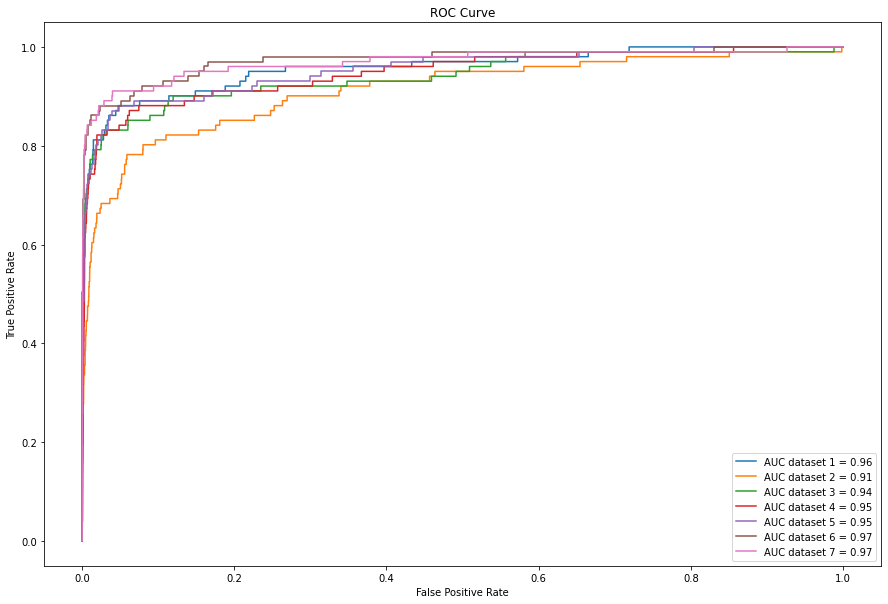

In [230]:
# Creation and testing of a model for the 7 sets of selected features

datasets = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]
features_names = [v1, v2, v3, v4, v5, v6, v_random]
metrics_train_set = None
metrics_valid_set = None
metrics_test_set = None
gnb_models = list()

for i, dataset in enumerate(datasets):
  # Creating the numpy array of the dataset
  dataset_np = dataset.to_numpy()
  # Splitting train set, validation set and test set
  x_train, y_train, x_valid, y_valid, x_test, y_test = train_split(dataset_np, percentage_train=0.7, percentage_validation=0.1)
  # Normalizing the train set
  x_train_normalized, data_train_min, data_train_max = min_max(x_train, None, None)

  # Defining the model
  gm = GaussianBayesModel(x_train_normalized, y_train, features_names[i])
  gnb_models.append(gm)

  # Normalizing the validation set
  x_valid_normalized, _, _ = min_max(x_valid, data_train_min, data_train_max)
  # Normalizing the test set
  x_test_normalized, _, _ = min_max(x_test, data_train_min, data_train_max)

  # Getting predictions with the trained model on train set
  y_predicted = gm.predict(x_train_normalized, safe_prediction_parameter=1)
  # Computing metrics
  metrics_train_set = metrics(y_predicted[:,None], y_train, metrics_df=metrics_train_set, dataset_label='v'+str(i+1)+' training')
  
  # Getting predictions with the trained model on validation set
  y_predicted = gm.predict(x_valid_normalized, safe_prediction_parameter=1)
  # Computing metrics
  metrics_valid_set = metrics(y_predicted[:,None], y_valid, metrics_df=metrics_valid_set, dataset_label='v'+str(i+1)+' validation')
  
  # Getting predictions with the trained model on test set
  y_predicted = gm.predict(x_test_normalized, safe_prediction_parameter=1)

  # Computing metrics
  metrics_test_set = metrics(y_predicted[:,None], y_test, metrics_df=metrics_test_set, dataset_label='v'+str(i+1)+' test')
  
  yday = gm.get_probability_positive(x_test_normalized)

  # Compute ROC and AUC
  fpr, tpr, _ = roc_curve(y_test, yday)
  roc_auc = auc(fpr, tpr)
  
  # Plot the ROC curve
  plt.plot(fpr, tpr, label='AUC dataset %d = %0.2f' % (i+1, roc_auc))
  
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [231]:
# Displaying the metrics for the training set
metrics_train_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 training,281,195407,3620,56,98.156137,83.382789,7.203281,13.260972
v2 training,245,196416,2611,92,98.644189,72.700297,8.578431,15.346070
v3 training,271,196695,2332,66,98.797175,80.415430,10.411064,18.435374
v4 training,260,196029,2998,77,98.457595,77.151335,7.980356,14.464534
v5 training,277,195479,3548,60,98.190245,82.195846,7.241830,13.310908
v6 training,280,194812,4215,57,97.857186,83.086053,6.229143,11.589404
v7 training,274,195334,3693,63,98.116009,81.305638,6.906983,12.732342


In [232]:
# Displaying the metrics for the validation set
metrics_valid_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 validation,45,27884,542,9,98.065309,83.333333,7.666099,14.040562
v2 validation,38,28041,385,16,98.591994,70.370370,8.983452,15.932914
v3 validation,42,28078,348,12,98.735955,77.777778,10.769231,18.918919
v4 validation,41,27995,431,13,98.441011,75.925926,8.686441,15.589354
v5 validation,43,27894,532,11,98.093399,79.629630,7.478261,13.672496
v6 validation,42,27806,620,12,97.780899,77.777778,6.344411,11.731844
v7 validation,42,27879,547,12,98.037219,77.777778,7.130730,13.063764


In [233]:
# Displaying the metrics for the test set
metrics_test_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 test,88,55769,1093,13,98.058389,87.128713,7.451312,13.728549
v2 test,72,56099,763,29,98.609624,71.287129,8.622754,15.384615
v3 test,82,56168,694,19,98.748310,81.188119,10.567010,18.700114
v4 test,76,55955,907,25,98.363850,75.247525,7.731434,14.022140
v5 test,81,55770,1092,20,98.047856,80.198020,6.905371,12.715856
v6 test,86,55586,1276,15,97.733617,85.148515,6.314244,11.756664
v7 test,84,55747,1115,17,98.012745,83.168317,7.005838,12.923077


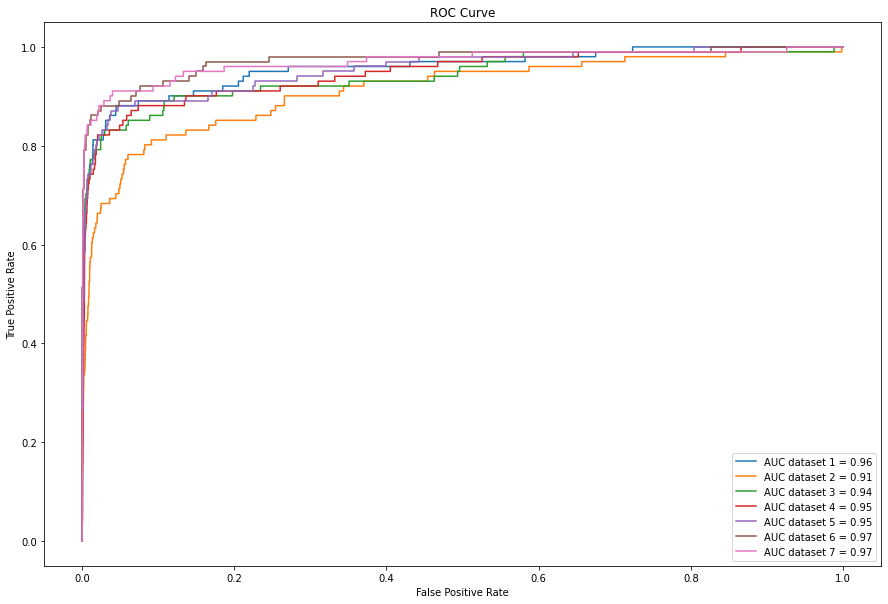

In [234]:
# Creation and testing of a model for the 7 sets of selected features with
# undersampling of the dataset
datasets = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]
features_names = [v1, v2, v3, v4, v5, v6, v_random]
metrics_train_set = None
metrics_valid_set = None
metrics_test_set = None
gnb_models_undersample = list()
ROC_curves = dict()

for i, dataset in enumerate(datasets):
  # Creating the numpy array of the dataset
  dataset_np = dataset.to_numpy()
  # Splitting train set, validation set and test set
  x_train, y_train, x_valid, y_valid, x_test, y_test = train_split(dataset_np, percentage_train=0.7, percentage_validation=0.1)
  # Normalizing the training set
  x_train_normalized, data_train_min, data_train_max = min_max(x_train, None, None)
  # Undersampling the training set
  x_train_normalized, y_train = undersample(x_train_normalized, y_train, 50.)

  # Defining the model
  gm = GaussianBayesModel(x_train_normalized, y_train, features_names[i])
  gnb_models_undersample.append(gm)

  # Normalizing the validation set
  x_valid_normalized, _, _ = min_max(x_valid, data_train_min, data_train_max)
  # Normalizing the test set
  x_test_normalized, _, _ = min_max(x_test, data_train_min, data_train_max)

  # Getting predictions with the trained model on train set
  y_predicted = gm.predict(x_train_normalized, safe_prediction_parameter=1)
  # Computing metrics
  metrics_train_set = metrics(y_predicted[:,None], y_train, metrics_df=metrics_train_set, dataset_label='v'+str(i+1)+' training')
  
  # Getting predictions with the trained model on validation set
  y_predicted = gm.predict(x_valid_normalized, safe_prediction_parameter=1)
  # Computing metrics
  metrics_valid_set = metrics(y_predicted[:,None], y_valid, metrics_df=metrics_valid_set, dataset_label='v'+str(i+1)+' validation')
  
  # Getting predictions with the trained model on test set
  y_predicted = gm.predict(x_test_normalized, safe_prediction_parameter=1)

  # Computing metrics
  metrics_test_set = metrics(y_predicted[:,None], y_test, metrics_df=metrics_test_set, dataset_label='v'+str(i+1)+' test')

  probabilities = gm.get_probability_positive(x_test_normalized)

  # Compute ROC and AUC
  fpr, tpr, _ = roc_curve(y_test, probabilities)
  roc_auc = auc(fpr, tpr)
  
  # Plot the ROC curve
  plt.plot(fpr, tpr, label='AUC dataset %d = %0.2f' % (i+1, roc_auc))

  # Save the ROC curve
  ROC_curves[i] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Save all the ROC curves for this classifier to plot them in the end
ROC_curves_per_classifier.append(ROC_curves)
  
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [235]:
# Displaying the metrics for the training set
metrics_train_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 training,286,16504,346,51,97.690115,84.866469,45.253165,59.029928
v2 training,253,16532,318,84,97.661023,75.074184,44.308231,55.726872
v3 training,278,16605,245,59,98.231221,82.492582,53.154876,64.651163
v4 training,271,16526,324,66,97.730843,80.415430,45.546218,58.154506
v5 training,279,16497,353,58,97.608658,82.789318,44.145570,57.585139
v6 training,283,16464,386,54,97.439926,83.976261,42.301943,56.262425
v7 training,277,16502,348,60,97.626113,82.195846,44.320000,57.588358


In [236]:
# Displaying the metrics for the validation set
metrics_valid_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 validation,45,27813,613,9,97.816011,83.333333,6.838906,12.640449
v2 validation,42,27878,548,12,98.033708,77.777778,7.118644,13.043478
v3 validation,43,27977,449,11,98.384831,79.629630,8.739837,15.750916
v4 validation,45,27828,598,9,97.868680,83.333333,6.998445,12.912482
v5 validation,44,27794,632,10,97.745787,81.481481,6.508876,12.054795
v6 validation,42,27743,683,12,97.559691,77.777778,5.793103,10.783055
v7 validation,43,27804,622,11,97.777388,79.629630,6.466165,11.961057


In [237]:
# Save the metrics
metrics_per_classifier.append(metrics_test_set)

# Displaying the metrics for the test set
metrics_test_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 test,89,55606,1256,12,97.773994,88.118812,6.617100,12.309820
v2 test,76,55722,1140,25,97.954813,75.247525,6.250000,11.541382
v3 test,83,55967,895,18,98.397205,82.178218,8.486708,15.384615
v4 test,81,55620,1242,20,97.784527,80.198020,6.122449,11.376404
v5 test,86,55562,1300,15,97.691484,85.148515,6.204906,11.566913
v6 test,87,55444,1418,14,97.486087,86.138614,5.780731,10.834371
v7 test,85,55613,1249,16,97.779260,84.158416,6.371814,11.846690


## Methods for inspecting the model

In [238]:
# Creating and testing of the model without undersampling

# Splitting train set, validation set and test set
x_train, y_train, x_valid, y_valid, x_test, y_test = train_split(data_1.to_numpy(), percentage_train=0.7, percentage_validation=0.1)
# Normalizing the training set
x_train_normalized, data_train_min, data_train_max = min_max(x_train, None, None)

# Defining the model
gm = GaussianBayesModel(x_train_normalized, y_train, v1)

# Normalizing the test set
x_test_normalized, _, _ = min_max(x_test, data_train_min, data_train_max)

# Getting predictions with the trained model
y_predicted = gm.predict(x_test_normalized, safe_prediction_parameter=1)

# Computing metrics
metrics(y_predicted[:,None], y_test, dataset_label='v1'+' test').style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 test,88,55769,1093,13,98.058389,87.128713,7.451312,13.728549


In [239]:
# Creating and testing of the model with undersampling

# Splitting train set, validation set and test set
x_train, y_train, x_valid, y_valid, x_test, y_test = train_split(data_1.to_numpy(), percentage_train=0.7, percentage_validation=0.1)
# Normalizing the training set
x_train_normalized, data_train_min, data_train_max = min_max(x_train, None, None)
# Undersampling the training set
x_train_normalized, y_train = undersample(x_train_normalized, y_train, 80.)

# Defining the model
gm_undersampling = GaussianBayesModel(x_train_normalized, y_train, v1)

# Normalizing the test set
x_test_normalized, _, _ = min_max(x_test, data_train_min, data_train_max)

# Getting predictions with the trained model
y_predicted = gm_undersampling.predict(x_test_normalized, safe_prediction_parameter=1)

# Computing metrics
metrics(y_predicted[:,None], y_test, dataset_label='v1'+' test').style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 test,89,55641,1221,12,97.835437,88.118812,6.793893,12.615167


The transaction is not fraud


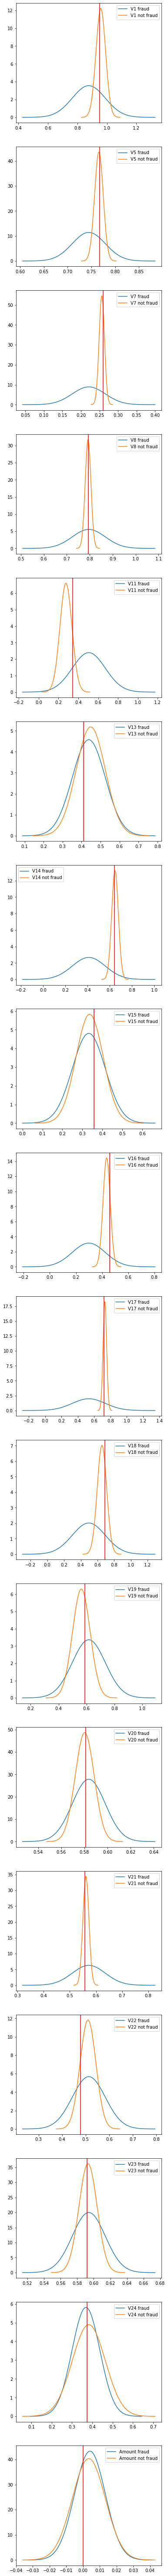

In [240]:
# Plotting the gaussian distribution representing the features
gm.plot_distributions(label_positive='fraud', label_negative='not fraud', sample=x_test_normalized[0,:])
print('The transaction is not fraud') if gm.predict(x_test_normalized[0,:][None,:])[0] == 0 else print('The transaction is a fraud')

## Additional demonstration about the distribution of the features

<AxesSubplot:ylabel='Count'>

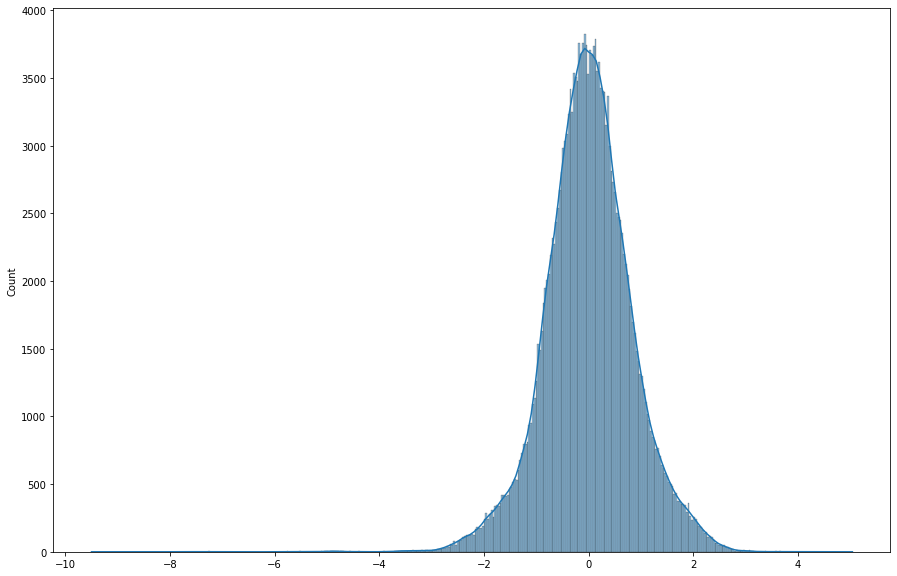

In [241]:
# The approximation of the distribution of the features to a gaussian distribution
# is supported by the following plot in which is possible to see that the
# distribution of the values of the features are approximately normal

# Plotting the distribution of the values of a feature of the training dataset
sns.histplot(x_train[:,10], kde = True)
# Analogous for the other features

# Artificial neural network

We define two possible ways to solve the problem using artificial neural network, which are very similar but with small differences.
The first method uses an artificial neural network with one neuron in the output layer. If the value of the output will be closer to 1 than to 0 (greater or equal to 0.5) the transaction will be classified as fraud, otherwise the transaction will be classified as not fraud.
The second method uses an artificial neural network with two neurons in the output layer. The outputs will represent the probability of the transaction given in input to be fraud or to be not a fraud.

The function needed for running the neural network are the same or very similar in the two cases but they are written twice in order to make possible to separately run the two sections.

Before running the training of the models and their testing phase, it is needed to run the "Function definition" subsection of the specific neural network that has to be created.

## ANN with one neuron in the output layer

### Functions definition

In [242]:
def initialize_parameters(layers_size):
  '''
  Returns the parameters of the artificial neural network given the number of
  neurons of its layers, namely it returns the matrix of weights and the bias
  vector for each layer 

  Parameters
  ----------
  layers_size: list
    ordered sizes of the layers of the artificial neural network it is required
    to be created

  Returns
  -------
  list
    parameters of the artificial neural network
  '''

  np.random.seed(0) # For reproducibility
  parameters = list()

  for i in range(len(layers_size) - 1):
    W = np.random.randn(layers_size[i+1], layers_size[i])
    b = np.zeros((layers_size[i+1], 1))
    parameters.append(W)
    parameters.append(b)
  
  return parameters

In [243]:
def ANN(x, parameters):
  '''
  Commputes the value of the output of the artificial neural network identified
  by its parameters given an input

  Parameters
  ----------
  x: ndarray
    input of the artificial neural network
  parameters: list
    parameters of the artificial neural network, namely weights and biases

  Returns
  -------
  ndarray
    output value of the artificial neural network

  Raises
  ------
  Exception
    if the size of the list containing the parameters is odd, it must be even
  '''

  if len(parameters)%2!=0:
    raise Exception("The input parameters must be in even number")
  
  layer = x.T
  
  num_layers = int(len(parameters)/2)+1
  weights = parameters[0::2]
  biases = parameters[1::2]

  for i in range(num_layers-1):
    layer = weights[i] @ layer - biases[i]
    
    # Activation function is applied to all the layers
    if i == num_layers-2:
      # On the output layer it is applied the sigmoid since the output is 
      # needed to be between 0 and 1
      layer = jax.nn.sigmoid(layer)
    else:
      # Only one of the following three lines has to be uncommented, the
      # application of a different activation function ends up in a different set
      # of hyperparameters to reach a good resulting model.
      # The sigmoid function needs a bigger network than the other two for
      # reaching a good result.

      layer = jnp.tanh(layer)
      #layer = jax.nn.relu(layer)
      #layer = jax.nn.sigmoid(layer)

  layer = layer.T
  
  return layer

In [244]:
def cross_entropy(x, y, parameters, class_weights=np.array([1.,1.])):
  '''
  Computes the cross entropy cost function in the case of an artificial neural
  network for a binary classification problem

  Parameters
  ----------
  x: ndarray
    input of the artificial neural network
  y: ndarray
    correct value of the output
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)

  Returns
  -------
  float
    cross entropy between the predictions of the artificial neural network
    and the correct value
  '''
  y_pred = ANN(x, parameters)
  return -jnp.mean(class_weights[0] * y * jnp.log(y_pred) + class_weights[1] * (1 - y) * jnp.log(1 - y_pred))

def MSE(x, y, parameters):
  '''
  Computes the mean squared error in the case of an artificial neural network
  
  Parameters
  ----------
  x: ndarray
    input of the artificial neural network
  y: ndarray
    correct value of the output
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  
  Returns
  -------
  float
    mean square error between the predictions of the artificial neural network
    and the correct value
  '''

  y_pred = ANN(x, parameters)
  return jnp.mean(jnp.square(y - y_pred))/2

def accuracy(x, y, parameters, threshold=0.5):
  '''
  Compute the accuracy of the prediction in the case of an artificial neural
  network for a binary classification problem

  Parameters
  ----------
  x: ndarray
    input of the artificial neural network
  y: ndarray
    correct value of the output
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  threshold: float, optional
    output value of the artificial neural network over which a sample is
    considered to belong to the positive class

  Returns
  -------
  float
    accuracy of the artificial neural network, namely the number of samples
    correctly classified divided by the total number of samples
  '''
  y_pred = ANN(x, parameters)
  labels_pred = y_pred >= threshold
  return jnp.mean(y == labels_pred)

# Computating the JIT version of the loss functions
cross_entropy_jit = jax.jit(cross_entropy)
MSE_jit = jax.jit(MSE)
accuracy_jit = jax.jit(accuracy)

In [245]:
def MSW(params):
  '''
  Computes the sum of the squared values of the weights of the artificial neural
  network

  Parameters
  ----------
  parameters: list
    parameters of the artificial neural network, namely weights and biases

  Returns
  -------
  float
    sum of the squared values of the weights of the artificial neural network
  '''
  weights = params[::2] # extracting the weights
  # Initializing the sum of the squared weights
  partial_sum = 0.0
  # Initializing the counter containing the number of parameters
  n_weights = 0
  for W in weights:
    partial_sum += jnp.sum(W * W)
    n_weights += W.shape[0] * W.shape[1]
  return partial_sum / n_weights

def cost_regularization(x, y, params, penalization, class_weights=np.array([1.,1.])):
  '''
  Computes the cost function applying regularization. It is used MSW for being
  able to regularize and the cross entropy for binary classification problem as
  standard cost function
  
  Parameters
  ----------
  x: ndarray
    input of the artificial neural network
  y: ndarray
    correct value of the output
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  penalization:
    weight to which the MSW is multiplied and that makes possible to modify the
    impact of the regularization term
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)

  Returns
  -------
  float
    cross entropy between the predictions of the artificial neural network
    and the correct values with regularization term
  '''
  return cross_entropy(x, y, params, class_weights=class_weights) + penalization * MSW(params)

In [246]:
def dump(x_train, y_train, parameters, histories, x_valid=None, y_valid=None):
  '''
  Updates the history of the values of the loss functions for the training set
  and for the validation set

  Parameters
  ----------
  x_train: ndarray
    input of the artificial neural network used for the training phase
  y_train: ndarray
    correct value of the output of the training set
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  histories: dict
    current history of the loss functions to which a new measurement has to be
    added
  x_valid: ndarray, optional
    input of the artificial neural network used for validating the model
  y_valid: ndarray, optional
    correct value of the output of the validation set

  Returns
  -------
  dict
    histories of the loss functions
  '''
  # The comments can be removed in order to return also the histories with
  # respect to the other cost funcions and not only with respect to the cross
  # entropy
  if histories is None or len(histories) == 0:
    histories = {'Xen_train': []}
    histories['MSE_train'] = []
    histories['acc_train'] = []
  if x_valid is not None and len(x_valid) != 0 and y_valid is not None and len(y_valid) != 0 and 'Xen_valid' not in histories.keys():
    histories['Xen_valid'] = []
    histories['MSE_valid'] = []
    histories['acc_valid'] = []
  elif x_valid is not None and len(x_valid) != 0 and y_valid is not None and len(y_valid) != 0:
    histories['Xen_valid'].append(cross_entropy_jit(x_valid, y_valid, parameters))
    histories['MSE_valid'].append(MSE_jit(x_valid, y_valid, parameters))
    histories['acc_valid'].append(accuracy_jit(x_valid, y_valid, parameters))
  histories['Xen_train'].append(cross_entropy_jit(x_train, y_train, parameters))
  histories['MSE_train'].append(MSE_jit(x_train, y_train, parameters))
  histories['acc_train'].append(accuracy_jit(x_train, y_train, parameters))
  return histories

In [247]:
def plot_history(histories):
  '''
  Plots the histories of the losses during execution
  
  Parameters
  ----------
  histories: dict
    values of the loss functions over time to be plotted
  '''
  
  fig, axs = plt.subplots(len(histories), 1, figsize=(8, 8*len(histories)))
  axs = axs.flatten()
  for i, key in enumerate(histories):
    axs[i].loglog(histories[key])
    axs[i].set_title(list(histories.keys())[i])

In [248]:
def SGD(x_train, y_train, x_valid, y_valid, parameters, num_epochs=1000, batch_size=128,
        learning_rate_min=1e-3, learning_rate_max=1e-1, learning_rate_decay=1000,
        penalization=1., class_weights=np.array([1.,1.])):
  """
  Stochastic xgradient descent method with mini-batch and learning rate decay

  Parameters
  ----------
  x_train: ndarray
    training set of the dataset to fit
  y_train: ndarray
    labels of the samples belonging to the training set
  x_valid: ndarray
    validation set of the dataset to fit
  y_valid: ndarray
    labels of the samples belonging to the validation set
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  num_epochs: int, optional
    number of epochs to perform
  batch_size: int, optional
    size of the batches to be used for computing the gradient
  learning_rate_min: float, optional
    minimum learning rate used in the training phase
  learning_rate_max: float, optional
    maximum learning rate used in the training phase
  learning_rate_decay: float, optional
    learning rate decay used in the training phase
  penalization: float, optional
    weight to which the MSW is multiplied and that makes possible to modify the
    impact of the regularization term, using penalization = 0, regularization is
    not applied
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)

  Returns
  -------
  parameters: list
    trained parameters of the artificial neural network, namely weights and
    biases optimized for fitting the training set
  histories: dict
    values of the loss functions over time
  """

  num_samples = x_train.shape[0]

  histories = dump(x_train, y_train, parameters, None, x_valid=x_valid, y_valid=y_valid)

  # Gradient of the cost function composed by the cross entropy for binary
  # classification problems and the regularization term
  grad_jit = jax.jit(jax.grad(cost_regularization, argnums = 2))

  for epoch in tqdm(range(num_epochs)):
    learning_rate = max(learning_rate_min, learning_rate_max * (1 - epoch/learning_rate_decay))

    idxs = np.random.choice(num_samples, batch_size)
    grads = grad_jit(x_train[idxs,:], y_train[idxs,:], parameters, penalization, class_weights=class_weights)

    for i in range(len(parameters)):
      parameters[i] -= learning_rate * grads[i]
    
    if epoch % 10 == 0:
      dump(x_train, y_train, parameters, histories, x_valid=x_valid, y_valid=y_valid)

  return parameters, histories

In [249]:
def NAG(x_train, y_train, x_valid, y_valid, parameters, num_epochs=1000, batch_size=128,
        learning_rate_min=1e-3, learning_rate_max=1e-1, learning_rate_decay=1000,
        decay_rate=0.9, penalization=1., class_weights=np.array([1.,1.])):
  """
  Implements the Nesterov accelleration method with mini-batch and learning rate
  decay

  Parameters
  ----------
  x_train: ndarray
    training set of the dataset to fit
  y_train: ndarray
    labels of the samples belonging to the training set
  x_valid: ndarray
    validation set of the dataset to fit
  y_valid: ndarray
    labels of the samples belonging to the validation set
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  num_epochs: int, optional
    number of epochs to perform
  batch_size: int, optional
    size of the batches to be used for computing the gradient
  learning_rate_min: float, optional
    minimum learning rate used in the training phase
  learning_rate_max: float, optional
    maximum learning rate used in the training phase
  learning_rate_decay: float, optional
    learning rate decay used in the training phase
  decay_rate: float, optional
    weight of the velocity vector at each iteration
  penalization: float, optional
    weight to which the MSW is multiplied and that makes possible to modify the
    impact of the regularization term, using penalization = 0, regularization is
    not applied
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)

  Returns
  -------
  parameters: list
    trained parameters of the artificial neural network, namely weights and
    biases optimized for fitting the training set
  histories: dict
    values of the loss functions over time
  """
  
  num_samples = x_train.shape[0]
  velocity = [0.0 for i in range(len(parameters))]
  grad_args = [0.0 for i in range(len(parameters))]

  histories = dump(x_train, y_train, parameters, None, x_valid=x_valid, y_valid=y_valid)

  # Gradient of the cost function composed by the cross entropy for binary
  # classification problems and the regularization term
  grad_jit = jax.jit(jax.grad(cost_regularization, argnums = 2))
  
  for epoch in tqdm(range(num_epochs)):
    learning_rate = max(learning_rate_min, learning_rate_max * (1 - epoch/learning_rate_decay))

    for i in range(len(parameters)):
      grad_args[i] = parameters[i] - decay_rate * velocity[i]
    idxs = np.random.choice(num_samples, batch_size)
    grads = grad_jit(x_train[idxs,:], y_train[idxs,:], grad_args, penalization, class_weights=class_weights)

    for i in range(len(parameters)):
      velocity[i] = decay_rate * velocity[i] + learning_rate * grads[i]
      parameters[i] -= velocity[i]
    
    if epoch % 10 == 0:
      dump(x_train, y_train, parameters, histories, x_valid=x_valid, y_valid=y_valid)

  return parameters, histories

In [250]:
def RMSprop(x_train, y_train, x_valid, y_valid, parameters, num_epochs=1000,
            batch_size=128, learning_rate=1e-3, decay_rate=0.8, penalization=1.,
            class_weights=np.array([1.,1.])):
  """
  Implements the RMSprop method with mini-batch and learning rate decay

  Parameters
  ----------
  x_train: ndarray
    training set of the dataset to fit
  y_train: ndarray
    labels of the samples belonging to the training set
  x_valid: ndarray
    validation set of the dataset to fit
  y_valid: ndarray
    labels of the samples belonging to the validation set
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  num_epochs: int, optional
    number of epochs to perform
  batch_size: int, optional
    size of the batches to be used for computing the gradient
  learning_rate: float, optional
    learning rate used in the training phase
  decay_rate: float, optional
    weight used for weighting the cumulative square grad vector at each iteration
  penalization: float, optional
    weight to which the MSW is multiplied and that makes possible to modify the
    impact of the regularization term, using penalization = 0, regularization is
    not applied
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)

  Returns
  -------
  parameters: list
    trained parameters of the artificial neural network, namely weights and
    biases optimized for fitting the training set
  histories: dict
    values of the loss functions over time
  """
  
  delta = 1e-7
  num_samples = x_train.shape[0]
  cumulative_square_grad = [0.0 for i in range(len(parameters))]

  histories = dump(x_train, y_train, parameters, None, x_valid=x_valid, y_valid=y_valid)

  # Gradient of the cost function composed by the cross entropy for binary
  # classification problems and the regularization term
  grad_jit = jax.jit(jax.grad(cost_regularization, argnums = 2))

  for epoch in tqdm(range(num_epochs)):
    idxs = np.random.choice(num_samples, batch_size)
    grads = grad_jit(x_train[idxs,:], y_train[idxs,:], parameters, penalization, class_weights=class_weights)

    for i in range(len(parameters)):
      cumulative_square_grad[i] = decay_rate * cumulative_square_grad[i] + (1 - decay_rate) * grads[i] * grads[i]
      parameters[i] -= learning_rate * grads[i] / (delta + jnp.sqrt(cumulative_square_grad[i]))
    
    if epoch % 10 == 0:
      dump(x_train, y_train, parameters, histories, x_valid=x_valid, y_valid=y_valid)

  return parameters, histories

In [251]:
def fit_classificator_ANN(x_train, y_train, x_valid, y_valid, layers_size,
                          opt_method='RMSprop', num_epochs=1000, batch_size=128,
                          learning_rate=1e-3, learning_rate_min=1e-3,
                          learning_rate_max=1e-1, learning_rate_decay=1000,
                          history_decay=0.9, regularization_parameter=1.,
                          class_weights=np.array([1.,1.])):
  '''
  Trains an artificial neural network given the labeled data.

  The classificator will be created using the given sizes and activation
  function on all the layers, except for the last one. On the last layer is
  applied the softmax activation function.
  
  Parameters
  ----------
  x_train: ndarray
    training set of the dataset to fit
  y_train: ndarray
    labels of the samples belonging to the training set
  x_valid: ndarray
    validation set of the dataset to fit
  y_valid: ndarray
    labels of the samples belonging to the validation set
  layers_size: list 
    ordered sizes of the layers of the artificial neural network
  opt_method: str, optional
    chosen optimization method, the possible values are 'SGD', 'NAG' and
    'RMSprop', stochastic gradient descent, Nesterov accelleration method and
    RMSprop respectively
  num_epochs: int, optional
    number of epochs of the chosen optimization method to perform
  batch_size: int, optional
    size of the batches to be used for computing the gradient in the chosen
    optimization method
  learning_rate: float, optional
    learning rate used in the training phase; here considered only for RMSprop
  learning_rate_min: float, optional
    minimum learning rate used in the training phase when using learning rate
    decay; here considered only for SGD and NAG
  learning_rate_max: float, optional
    maximum learning rate used in the training phase when using learning rate
    decay; here considered only for SGD and NAG
  learning_rate_decay: float, optional
    learning rate decay used in the training phase when using learning rate
    decay; here considered only for SGD and NAG
  history_decay: float, optional
    weight used for weighting the history of gradients at each iteration when
    the optimization method uses the history of gradients; here considered only
    for NAG and RMSprop
  regularization_parameter: float, optional
    weight to which the MSW is multiplied and that makes possible to modify the
    impact of the regularization term in the chosen optimization method, using
    penalization = 0, regularization is not applied
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)
  
  Returns
  -------
  parameters: list
    parameters of the trained artificial neural network
  history: dict
    history of the loss functions during the training phase
  '''
  
  parameters = initialize_parameters(layers_size)
  if opt_method == 'SGD':
    ANN_params, history = SGD(x_train, y_train, x_valid, y_valid, parameters,
                              num_epochs=num_epochs, batch_size=batch_size, learning_rate_min=learning_rate_min,
                              learning_rate_max=learning_rate_max, learning_rate_decay=learning_rate_decay,
                              penalization=regularization_parameter, class_weights=class_weights)
  elif opt_method == 'NAG':
    ANN_params, history = NAG(x_train, y_train, x_valid, y_valid, parameters,
                              num_epochs=num_epochs, batch_size=batch_size, learning_rate_min=learning_rate_min,
                              learning_rate_max=learning_rate_max, learning_rate_decay=learning_rate_decay,
                              decay_rate=history_decay, penalization=regularization_parameter,
                              class_weights=class_weights)
  elif opt_method == 'RMSprop':
    ANN_params, history = RMSprop(x_train, y_train, x_valid, y_valid, parameters,
                                  num_epochs=num_epochs, batch_size=batch_size, learning_rate=learning_rate,
                                  decay_rate=history_decay, penalization=regularization_parameter,
                                  class_weights=class_weights)
  else:
    ANN_params, history = RMSprop(x_train, y_train, x_valid, y_valid, parameters,
                                  num_epochs=num_epochs, batch_size=batch_size, learning_rate=learning_rate,
                                  decay_rate=history_decay, penalization=regularization_parameter,
                                  class_weights=class_weights)

  return ANN_params, history

### Training and testing ANN

Run the previous subsection before running the training and testing of the artificial neural network.

  0%|          | 0/2000 [00:00<?, ?it/s]

,Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
0,v7 test,82,56781,81,19,99.824447,81.188119,50.306748,62.121212


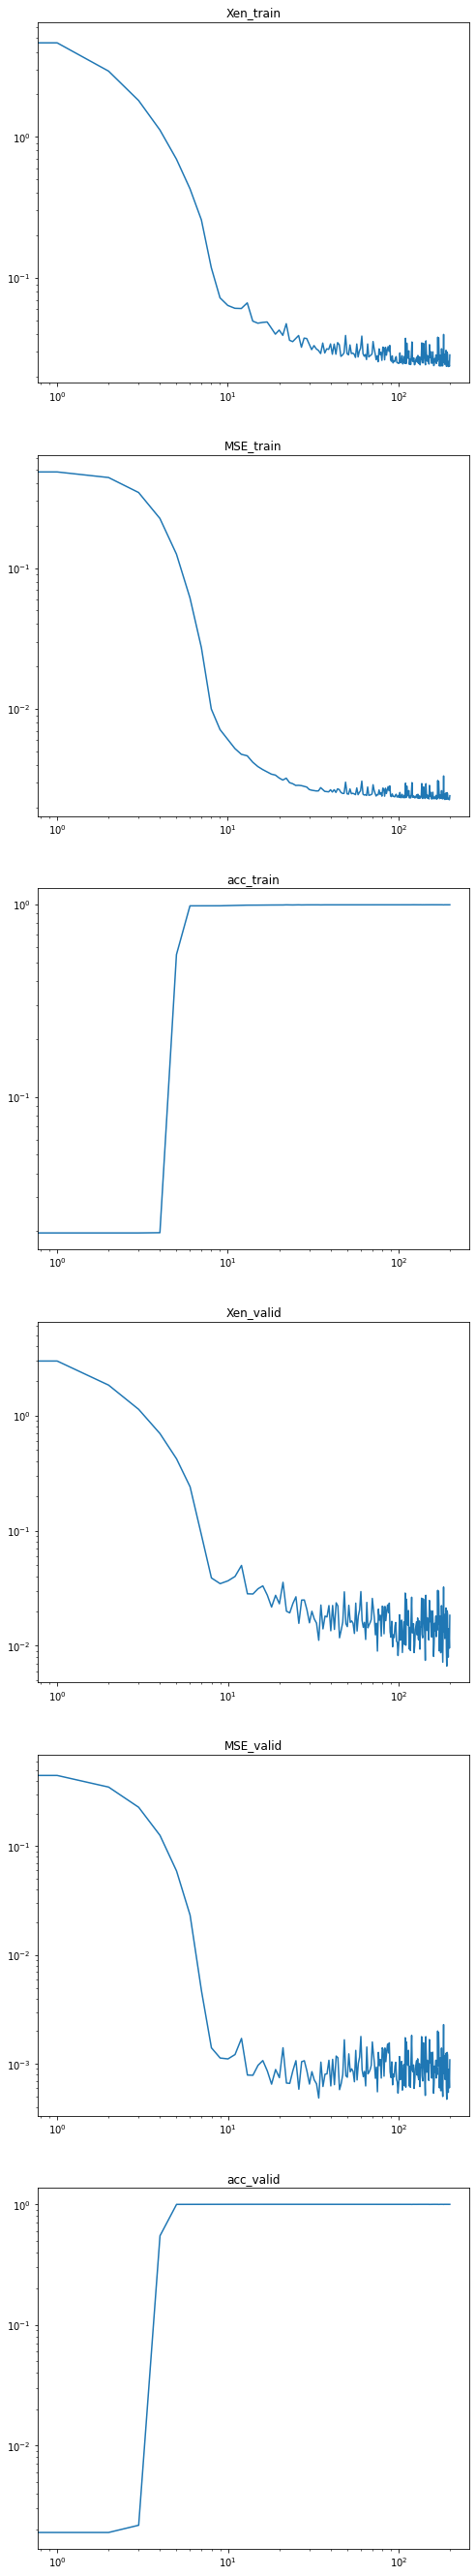

In [252]:
# Creation and testing of a model for the random dataset with undersampling of the
# dataset

dataset_index = 7
# Creating the numpy array of the dataset
dataset_np = data_7.to_numpy()
# Splitting training set, validation set and test set
x_train, y_train, x_valid, y_valid, x_test, y_test = train_split(dataset_np, percentage_train=0.7, percentage_validation=0.1)
# Normalizing the training set
x_train_normalized, data_train_min, data_train_max = min_max(x_train, None, None)
# Undersampling the training set
x_train_normalized, y_train = undersample(x_train_normalized, y_train, 50.)

# Normalizing the validation set
x_valid_normalized, _, _ = min_max(x_valid, data_train_min, data_train_max)
# Normalizing the test set
x_test_normalized, _, _ = min_max(x_test, data_train_min, data_train_max)

# Definition of the model
layers_size = [x_train.shape[1],30,20,1]

# Training the ANN
ANN_params, history = fit_classificator_ANN(x_train_normalized, y_train, x_valid_normalized, y_valid,
                                            layers_size, opt_method='RMSprop', num_epochs=2000, batch_size=256,
                                            learning_rate=1e-3, history_decay=0.8, regularization_parameter=0.5,
                                            class_weights=np.array([2.8,1]))

# Plotting the training history
plot_history(history)

# Getting predictions with the trained model on train set
y_predicted = ANN(x_train_normalized, ANN_params)
y_predicted = y_predicted >= 0.5

# Computing metrics for the training set
metrics_train_set = metrics(y_predicted, y_train, dataset_label='v'+str(dataset_index)+' training')

# Getting predictions with the trained model on validation set
y_predicted = ANN(x_valid_normalized, ANN_params)
y_predicted = y_predicted >= 0.5

# Computing metrics for the validation set
metrics_valid_set = metrics(y_predicted, y_valid, dataset_label='v'+str(dataset_index)+' validation')

# Getting predictions with the trained model on test set
y_predicted = ANN(x_test_normalized, ANN_params) # different name for using the probabilities in the plot of the ROC curve
y_predicted = y_predicted >= 0.5

# Computing metrics for the test set
metrics_test_set = metrics(y_predicted, y_test, dataset_label='v'+str(dataset_index)+' test')

metrics_test_set

In [253]:
# Displaying the metrics for the training set
metrics_train_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v7 training,274,16826,24,63,99.493803,81.305638,91.946309,86.299213


In [254]:
# Displaying the metrics for the validation set
metrics_valid_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v7 validation,41,28382,44,13,99.799860,75.925926,48.235294,58.992806


In [255]:
# Displaying the metrics for the test set
metrics_test_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v7 test,82,56781,81,19,99.824447,81.188119,50.306748,62.121212


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

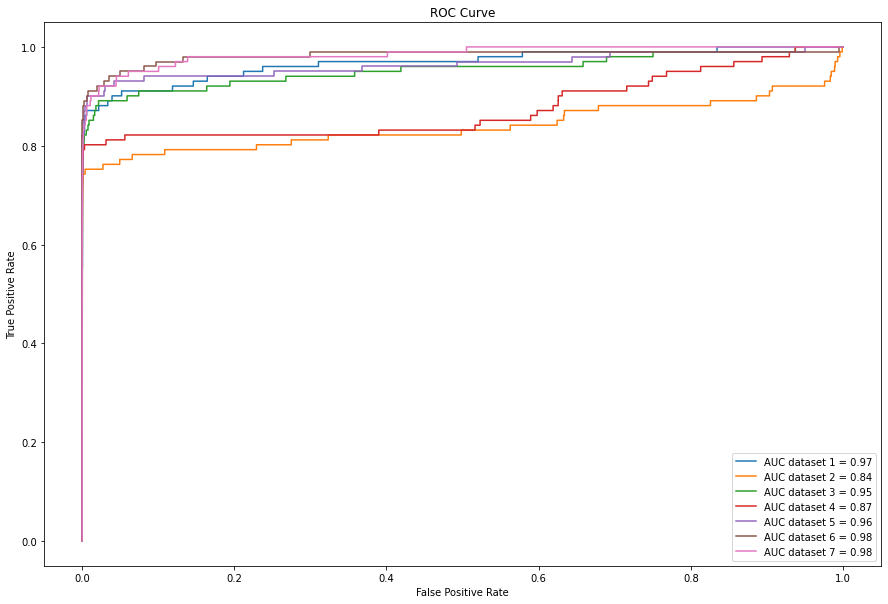

In [256]:
# Creation and testing of a model for the 7 sets of selected features with
# undersampling of the dataset

datasets = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]
features_names = [v1, v2, v3, v4, v5, v6, v_random]
metrics_train_set = None
metrics_valid_set = None
metrics_test_set = None
ANN_parameters = list()
histories = list()
ROC_curves = dict()

for i, dataset in enumerate(datasets):
  # Creating the numpy array of the dataset
  dataset_np = dataset.to_numpy()
  # Splitting training set, validation set and test set
  x_train, y_train, x_valid, y_valid, x_test, y_test = train_split(dataset_np, percentage_train=0.7, percentage_validation=0.1)
  # Normalizing the training set
  x_train_normalized, data_train_min, data_train_max = min_max(x_train, None, None)
  # Undersampling the training set
  x_train_normalized, y_train = undersample(x_train_normalized, y_train, 50.)

  # Normalizing the validation set
  x_valid_normalized, _, _ = min_max(x_valid, data_train_min, data_train_max)
  # Normalizing the test set
  x_test_normalized, _, _ = min_max(x_test, data_train_min, data_train_max)

  # Definition of the model
  layers_size = [x_train.shape[1],30,20,1]

 # Training the ANN
  ANN_params, history = fit_classificator_ANN(x_train_normalized, y_train, x_valid_normalized, y_valid,
                                              layers_size, opt_method='RMSprop', num_epochs=2000, batch_size=256,
                                              learning_rate=1e-3, history_decay=0.8, regularization_parameter=0.5,
                                              class_weights=np.array([2.8,1]))
  ANN_parameters.append(ANN_params)
  # Plotting the training history
  histories.append(history)

  # Getting predictions with the trained model on train set
  y_predicted = ANN(x_train_normalized, ANN_params)
  y_predicted = y_predicted >= 0.5
  # Computing metrics for the training set
  metrics_train_set = metrics(y_predicted, y_train, metrics_df=metrics_train_set, dataset_label='v'+str(i+1)+' training')
  
  # Getting predictions with the trained model on validation set
  y_predicted = ANN(x_valid_normalized, ANN_params)
  y_predicted = y_predicted >= 0.5
  # Computing metrics for the validation set
  metrics_valid_set = metrics(y_predicted, y_valid, metrics_df=metrics_valid_set, dataset_label='v'+str(i+1)+' validation')
  
  # Getting predictions with the trained model on test set
  y_probabilities = ANN(x_test_normalized, ANN_params) # different name for using the probabilities in the plot of the ROC curve
  y_predicted = y_probabilities >= 0.5
  # Computing metrics for the test set
  metrics_test_set = metrics(y_predicted, y_test, metrics_df=metrics_test_set, dataset_label='v'+str(i+1)+' test')
  
  # Compute ROC and AUC
  fpr, tpr, _ = roc_curve(y_test, y_probabilities)
  roc_auc = auc(fpr, tpr)
  
  # Plotting the ROC curve
  plt.plot(fpr, tpr, label='AUC dataset %d = %0.2f' % (i+1, roc_auc))

  # Save the ROC curve
  ROC_curves[i] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Save all the ROC curves for this classifier to plot them in the end
ROC_curves_per_classifier.append(ROC_curves)
  
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [257]:
# Displaying the metrics for the training set
metrics_train_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 training,262,16824,26,75,99.412347,77.744807,90.972222,83.840000
v2 training,210,16845,5,127,99.231978,62.314540,97.674419,76.086957
v3 training,257,16840,10,80,99.476348,76.261128,96.254682,85.099338
v4 training,235,16845,5,102,99.377436,69.732938,97.916667,81.455806
v5 training,274,16834,16,63,99.540350,81.305638,94.482759,87.400319
v6 training,277,16840,10,60,99.592715,82.195846,96.515679,88.782051
v7 training,274,16826,24,63,99.493803,81.305638,91.946309,86.299213


In [258]:
# Displaying the metrics for the validation set
metrics_valid_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 validation,42,28384,42,12,99.810393,77.777778,50.000000,60.869565
v2 validation,37,28419,7,17,99.915730,68.518519,84.090909,75.510204
v3 validation,42,28416,10,12,99.922753,77.777778,80.769231,79.245283
v4 validation,39,28417,9,15,99.915730,72.222222,81.250000,76.470588
v5 validation,43,28401,25,11,99.873596,79.629630,63.235294,70.491803
v6 validation,42,28411,15,12,99.905197,77.777778,73.684211,75.675676
v7 validation,41,28382,44,13,99.799860,75.925926,48.235294,58.992806


In [259]:
# Save the metrics
metrics_per_classifier.append(metrics_test_set)

# Displaying the metrics for the test set
metrics_test_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 test,79,56790,72,22,99.834981,78.217822,52.317881,62.698413
v2 test,56,56849,13,45,99.898180,55.445545,81.159420,65.882353
v3 test,78,56836,26,23,99.913979,77.227723,75.000000,76.097561
v4 test,65,56850,12,36,99.915735,64.356436,84.415584,73.033708
v5 test,86,56811,51,15,99.884135,85.148515,62.773723,72.268908
v6 test,86,56830,32,15,99.917490,85.148515,72.881356,78.538813
v7 test,82,56781,81,19,99.824447,81.188119,50.306748,62.121212


## ANN with two neurons in the output layer

### Functions definition

In [260]:
def initialize_parameters(layers_size):
  '''
  Returns the parameters of the artificial neural network given the number of
  neurons of its layers, namely it returns the matrix of weights and the bias
  vector for each layer 

  Parameters
  ----------
  layers_size: list
    ordered sizes of the layers of the artificial neural network it is required
    to be created

  Returns
  -------
  list
    parameters of the artificial neural network
  '''

  np.random.seed(0) # For reproducibility
  parameters = list()

  for i in range(len(layers_size) - 1):
    W = np.random.randn(layers_size[i+1], layers_size[i])
    b = np.zeros((layers_size[i+1], 1))
    parameters.append(W)
    parameters.append(b)
  
  return parameters

In [261]:
def ANN(x, parameters):
  '''
  Commputes the value of the output of the artificial neural network identified
  by its parameters given an input, considering a last layer which is the
  softmax layer

  Parameters
  ----------
  x: ndarray
    input of the artificial neural network
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  
  Returns
  -------
  ndarray
    output value of the artificial neural network

  Raises
  ------
  Exception
    if the size of the list containing the parameters is odd, it must be even
  '''

  if len(parameters)%2!=0:
    raise Exception("The input parameters must be in even number")

  layer = x.T  
  
  num_layers = int(len(parameters)/2)+1
  weights = parameters[0::2]
  biases = parameters[1::2]

  for i in range(num_layers-1):
    layer = weights[i] @ layer - biases[i]
    
    # Activation function is applied to all the layers

    # Only one of the following three lines has to be uncommented, the
    # application of a different activation function ends up in a different set
    # of hyperparameters to reach a good resulting model.
    # The sigmoid function needs a bigger network than the other two for
    # reaching a good result.
      
    layer = jnp.tanh(layer)
    #layer = jax.nn.relu(layer)
    #layer = jax.nn.sigmoid(layer)
  
  # On the output layer it is applied a softmax function since the output is 
  # needed to be between 0 and 1 and to be a probability
  den = jnp.sum(jnp.exp(layer), axis = 0)
  layer = jnp.exp(layer) / den

  layer = layer.T
  
  return layer

In [262]:
def cross_entropy_general(x, y, parameters, class_weights=np.array([1.,1.])):
  '''
  Computes the cross entropy cost function in the case of an artificial neural
  network for a general classification problem, namely with an artificial neural
  network with the number of outputs equals to the number of classes

  Parameters
  ----------
  x: ndarray
    input of the artificial neural network
  y: ndarray
    correct value of the output, one-hot representation
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)

  Returns
  -------
  float
    cross entropy between the predictions of the artificial neural network
    and the correct values
  '''
  y_pred = ANN(x, parameters)
  return -jnp.mean(jnp.sum(y * class_weights * jnp.log(y_pred), axis=1))

cross_entropy_general_jit = jax.jit(cross_entropy_general)

In [263]:
def MSW(params):
  '''
  Computes the sum of the squared values of the weights of the artificial neural
  network

  Parameters
  ----------
  parameters: list
    parameters of the artificial neural network, namely weights and biases

  Returns
  -------
  float
    sum of the squared values of the weights of the artificial neural network
  '''
  weights = params[::2] # extracting the weights
  # Initializing the sum of the squared weights
  partial_sum = 0.0
  # Initializing the counter containing the number of parameters
  n_weights = 0
  for W in weights:
    partial_sum += jnp.sum(W * W)
    n_weights += W.shape[0] * W.shape[1]
  return partial_sum / n_weights

def cost_regularization(x, y, params, penalization, class_weights=np.array([1.,1.])):
  '''
  Computes the cost function applying regularization. It is used MSW for being
  able to regularize and the cross entropy for general classification problem as
  standard cost function
  
  Parameters
  ----------
  x: ndarray
    input of the artificial neural network
  y: ndarray
    correct value of the output, one-hot representation
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  penalization:
    weight to which the MSW is multiplied and that makes possible to modify the
    impact of the regularization term
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)
    
  Returns
  -------
  float
    cross entropy between the predictions of the artificial neural network
    and the correct values with regularization term
  '''
  return cross_entropy_general(x, y, params, class_weights=class_weights) + penalization * MSW(params)

In [264]:
def dump(x_train, y_train, parameters, histories, x_valid=None, y_valid=None):
  '''
  Updates the history of the values of the loss functions for the training set
  and for the validation set

  Parameters
  ----------
  x_train: ndarray
    input of the artificial neural network used for the training phase
  y_train: ndarray
    correct value of the output of the training set
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  histories: dict
    current history of the loss functions to which a new measurement has to be
    added
  x_valid: ndarray, optional
    input of the artificial neural network used for validating the model
  y_valid: ndarray, optional
    correct value of the output of the validation set

  Returns
  -------
  dict
    histories of the loss functions
  '''

  if histories is None or len(histories) == 0:
    histories = {'Xen_train': []}
  if x_valid is not None and len(x_valid) != 0 and y_valid is not None and len(y_valid) != 0 and 'Xen_valid' not in histories.keys():
    histories['Xen_valid'] = []
  elif x_valid is not None and len(x_valid) != 0 and y_valid is not None and len(y_valid) != 0:
    histories['Xen_valid'].append(cross_entropy_general_jit(x_valid, y_valid, parameters))
  histories['Xen_train'].append(cross_entropy_general_jit(x_train, y_train, parameters))

  return histories

In [265]:
def plot_history(histories):
  '''
  Plots the histories of the losses during execution
  
  Parameters
  ----------
  histories: dict
    values of the loss functions over time to be plotted
  '''
  
  fig, axs = plt.subplots(len(histories), 1, figsize=(8, 8*len(histories)))
  axs = axs.flatten()
  for i, key in enumerate(histories):
    axs[i].loglog(histories[key])
    axs[i].set_title(list(histories.keys())[i])

In [266]:
def SGD(x_train, y_train, x_valid, y_valid, parameters, num_epochs=1000, batch_size=128,
        learning_rate_min=1e-3, learning_rate_max=1e-1, learning_rate_decay=1000,
        penalization=1., class_weights=np.array([1.,1.])):
  """
  Stochastic xgradient descent method with mini-batch and learning rate decay

  Parameters
  ----------
  x_train: ndarray
    training set of the dataset to fit
  y_train: ndarray
    labels of the samples belonging to the training set
  x_valid: ndarray
    validation set of the dataset to fit
  y_valid: ndarray
    labels of the samples belonging to the validation set
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  num_epochs: int, optional
    number of epochs to perform
  batch_size: int, optional
    size of the batches to be used for computing the gradient
  learning_rate_min: float, optional
    minimum learning rate used in the training phase
  learning_rate_max: float, optional
    maximum learning rate used in the training phase
  learning_rate_decay: float, optional
    learning rate decay used in the training phase
  penalization: float, optional
    weight to which the MSW is multiplied and that makes possible to modify the
    impact of the regularization term, using penalization = 0, regularization is
    not applied
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)

  Returns
  -------
  parameters: list
    trained parameters of the artificial neural network, namely weights and
    biases optimized for fitting the training set
  histories: dict
    values of the loss functions over time
  """

  num_samples = x_train.shape[0]

  histories = dump(x_train, y_train, parameters, None, x_valid=x_valid, y_valid=y_valid)

  # Gradient of the cost function composed by the cross entropy for general
  # classification problems and the regularization term
  grad_jit = jax.jit(jax.grad(cost_regularization, argnums = 2))

  for epoch in tqdm(range(num_epochs)):
    learning_rate = max(learning_rate_min, learning_rate_max * (1 - epoch/learning_rate_decay))

    idxs = np.random.choice(num_samples, batch_size)
    grads = grad_jit(x_train[idxs,:], y_train[idxs,:], parameters, penalization, class_weights=class_weights)

    for i in range(len(parameters)):
      parameters[i] -= learning_rate * grads[i]
    
    if epoch % 10 == 0:
      dump(x_train, y_train, parameters, histories, x_valid=x_valid, y_valid=y_valid)

  return parameters, histories

In [267]:
def NAG(x_train, y_train, x_valid, y_valid, parameters, num_epochs=1000, batch_size=128,
        learning_rate_min=1e-3, learning_rate_max=1e-1, learning_rate_decay=1000,
        decay_rate=0.9, penalization=1., class_weights=np.array([1.,1.])):
  """
  Implements the Nesterov accelleration method with mini-batch and learning rate
  decay

  Parameters
  ----------
  x_train: ndarray
    training set of the dataset to fit
  y_train: ndarray
    labels of the samples belonging to the training set
  x_valid: ndarray
    validation set of the dataset to fit
  y_valid: ndarray
    labels of the samples belonging to the validation set
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  num_epochs: int, optional
    number of epochs to perform
  batch_size: int, optional
    size of the batches to be used for computing the gradient
  learning_rate_min: float, optional
    minimum learning rate used in the training phase
  learning_rate_max: float, optional
    maximum learning rate used in the training phase
  learning_rate_decay: float, optional
    learning rate decay used in the training phase
  decay_rate: float, optional
    weight of the velocity vector at each iteration
  penalization: float, optional
    weight to which the MSW is multiplied and that makes possible to modify the
    impact of the regularization term, using penalization = 0, regularization is
    not applied
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)

  Returns
  -------
  parameters: list
    trained parameters of the artificial neural network, namely weights and
    biases optimized for fitting the training set
  histories: dict
    values of the loss functions over time
  """

  num_samples = x_train.shape[0]
  velocity = [0.0 for i in range(len(parameters))]
  grad_args = [0.0 for i in range(len(parameters))]

  histories = dump(x_train, y_train, parameters, None, x_valid=x_valid, y_valid=y_valid)

  # Gradient of the cost function composed by the cross entropy for general
  # classification problems and the regularization term
  grad_jit = jax.jit(jax.grad(cost_regularization, argnums = 2))
  
  for epoch in tqdm(range(num_epochs)):
    learning_rate = max(learning_rate_min, learning_rate_max * (1 - epoch/learning_rate_decay))

    for i in range(len(parameters)):
      grad_args[i] = parameters[i] - decay_rate * velocity[i]
    idxs = np.random.choice(num_samples, batch_size)
    grads = grad_jit(x_train[idxs,:], y_train[idxs,:], grad_args, penalization, class_weights=class_weights)

    for i in range(len(parameters)):
      velocity[i] = decay_rate * velocity[i] + learning_rate * grads[i]
      parameters[i] -= velocity[i]
    
    if epoch % 10 == 0:
      dump(x_train, y_train, parameters, histories, x_valid=x_valid, y_valid=y_valid)

  return parameters, histories

In [268]:
def RMSprop(x_train, y_train, x_valid, y_valid, parameters, num_epochs=1000,
            batch_size=128, learning_rate=1e-3, decay_rate=0.8, penalization=1.,
            class_weights=np.array([1.,1.])):
  """
  Implements the RMSprop method with mini-batch and learning rate decay

  Parameters
  ----------
  x_train: ndarray
    training set of the dataset to fit
  y_train: ndarray
    labels of the samples belonging to the training set
  x_valid: ndarray
    validation set of the dataset to fit
  y_valid: ndarray
    labels of the samples belonging to the validation set
  parameters: list
    parameters of the artificial neural network, namely weights and biases
  num_epochs: int, optional
    number of epochs to perform
  batch_size: int, optional
    size of the batches to be used for computing the gradient
  learning_rate: float, optional
    learning rate used in the training phase
  decay_rate: float, optional
    weight used for weighting the cumulative square grad vector at each iteration
  penalization: float, optional
    weight to which the MSW is multiplied and that makes possible to modify the
    impact of the regularization term, using penalization = 0, regularization is
    not applied
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)

  Returns
  -------
  parameters: list
    trained parameters of the artificial neural network, namely weights and
    biases optimized for fitting the training set
  histories: dict
    values of the loss functions over time
  """
  
  delta = 1e-7
  num_samples = x_train.shape[0]
  cumulative_square_grad = [0.0 for i in range(len(parameters))]

  histories = dump(x_train, y_train, parameters, None, x_valid=x_valid, y_valid=y_valid)

  # Gradient of the cost function composed by the cross entropy for general
  # classification problems and the regularization term
  grad_jit = jax.jit(jax.grad(cost_regularization, argnums = 2))

  for epoch in tqdm(range(num_epochs)):
    idxs = np.random.choice(num_samples, batch_size)
    grads = grad_jit(x_train[idxs,:], y_train[idxs,:], parameters, penalization, class_weights=class_weights)

    for i in range(len(parameters)):
      cumulative_square_grad[i] = decay_rate * cumulative_square_grad[i] + (1 - decay_rate) * grads[i] * grads[i]
      parameters[i] -= learning_rate * grads[i] / (delta + jnp.sqrt(cumulative_square_grad[i]))
    
    if epoch % 10 == 0:
      dump(x_train, y_train, parameters, histories, x_valid=x_valid, y_valid=y_valid)

  return parameters, histories

In [269]:
def fit_classificator_ANN(x_train, y_train, x_valid, y_valid, layers_size,
                          opt_method='RMSprop', num_epochs=1000, batch_size=128,
                          learning_rate=1e-3, learning_rate_min=1e-3,
                          learning_rate_max=1e-1, learning_rate_decay=1000,
                          history_decay=0.9, regularization_parameter=1.,
                          class_weights=np.array([1.,1.])):
  '''
  Trains an artificial neural network given the labeled data.

  The classificator will be created using the given sizes and activation
  function on all the layers, except for the last one. On the last layer is
  applied the softmax activation function.
  
  Parameters
  ----------
  x_train: ndarray
    training set of the dataset to fit
  y_train: ndarray
    labels of the samples belonging to the training set
  x_valid: ndarray
    validation set of the dataset to fit
  y_valid: ndarray
    labels of the samples belonging to the validation set
  layers_size: list 
    ordered sizes of the layers of the artificial neural network
  opt_method: str, optional
    chosen optimization method, the possible values are 'SGD', 'NAG' and
    'RMSprop', stochastic gradient descent, Nesterov accelleration method and
    RMSprop respectively
  num_epochs: int, optional
    number of epochs of the chosen optimization method to perform
  batch_size: int, optional
    size of the batches to be used for computing the gradient in the chosen
    optimization method
  learning_rate: float, optional
    learning rate used in the training phase; here considered only for RMSprop
  learning_rate_min: float, optional
    minimum learning rate used in the training phase when using learning rate
    decay; here considered only for SGD and NAG
  learning_rate_max: float, optional
    maximum learning rate used in the training phase when using learning rate
    decay; here considered only for SGD and NAG
  learning_rate_decay: float, optional
    learning rate decay used in the training phase when using learning rate
    decay; here considered only for SGD and NAG
  history_decay: float, optional
    weight used for weighting the history of gradients at each iteration when
    the optimization method uses the history of gradients; here considered only
    for NAG and RMSprop
  regularization_parameter: float, optional
    weight to which the MSW is multiplied and that makes possible to modify the
    impact of the regularization term in the chosen optimization method, using
    penalization = 0, regularization is not applied
  class_weights: ndarray, optional
    values used for weighting the error given by the positive class (element in 
    position 0) and by the negative class (element in position 1)
  
  Returns
  -------
  parameters: list
    parameters of the trained artificial neural network
  history: dict
    history of the loss functions during the training phase
  '''
  
  parameters = initialize_parameters(layers_size)
  if opt_method == 'SGD':
    ANN_params, history = SGD(x_train, y_train, x_valid, y_valid, parameters,
                              num_epochs=num_epochs, batch_size=batch_size, learning_rate_min=learning_rate_min,
                              learning_rate_max=learning_rate_max, learning_rate_decay=learning_rate_decay,
                              penalization=regularization_parameter, class_weights=class_weights)
  elif opt_method == 'NAG':
    ANN_params, history = NAG(x_train, y_train, x_valid, y_valid, parameters,
                              num_epochs=num_epochs, batch_size=batch_size, learning_rate_min=learning_rate_min,
                              learning_rate_max=learning_rate_max, learning_rate_decay=learning_rate_decay,
                              decay_rate=history_decay, penalization=regularization_parameter,
                              class_weights=class_weights)
  elif opt_method == 'RMSprop':
    ANN_params, history = RMSprop(x_train, y_train, x_valid, y_valid, parameters,
                                  num_epochs=num_epochs, batch_size=batch_size, learning_rate=learning_rate,
                                  decay_rate=history_decay, penalization=regularization_parameter,
                                  class_weights=class_weights)
  else:
    ANN_params, history = RMSprop(x_train, y_train, x_valid, y_valid, parameters,
                                  num_epochs=num_epochs, batch_size=batch_size, learning_rate=learning_rate,
                                  decay_rate=history_decay, penalization=regularization_parameter,
                                  class_weights=class_weights)

  return ANN_params, history

In [270]:
def onehot_representation(y, dim):
  y_data = np.zeros((y.shape[0], dim))
  for i in range(dim):
    y_data[y.reshape(y.shape[0]) == i,i] = 1
  return y_data

### Training and testing ANN

Run the previous subsection before running the training and testing of the artificial neural network.

  0%|          | 0/2500 [00:00<?, ?it/s]

,Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
0,v7 test,77,56851,11,24,99.938557,76.237624,87.5,81.481481


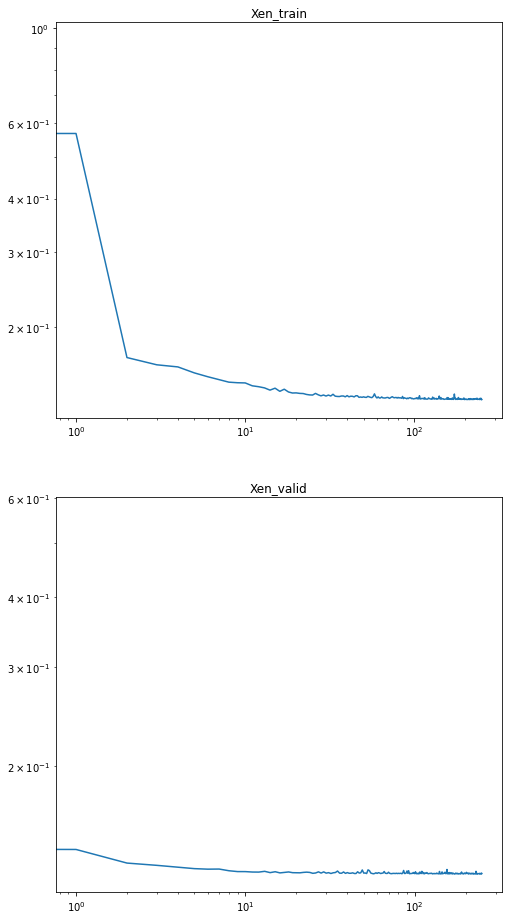

In [271]:
# Creation and testing of a model for the random dataset with undersampling of the
# dataset

dataset_index = 7
# Creating the numpy array of the dataset
dataset_np = data_7.to_numpy()
# Splitting training set, validation set and test set
x_train, y_train, x_valid, y_valid, x_test, y_test = train_split(dataset_np, percentage_train=0.7, percentage_validation=0.1)
# Normalizing the training set
x_train_normalized, data_train_min, data_train_max = min_max(x_train, None, None)
# Undersampling the training set
x_train_normalized, y_train = undersample(x_train_normalized, y_train, 50.)

# Normalizing the validation set
x_valid_normalized, _, _ = min_max(x_valid, data_train_min, data_train_max)
# Normalizing the test set
x_test_normalized, _, _ = min_max(x_test, data_train_min, data_train_max)

# Creating the onehot representation of the datasets
dim = 2
y_train = onehot_representation(y_train, dim)
y_valid = onehot_representation(y_valid, dim)
y_test = onehot_representation(y_test, dim)

# Definition of the model
layers_size = [x_train.shape[1],30,30,10,2]

# Training the ANN
ANN_params, history = fit_classificator_ANN(x_train_normalized, y_train, x_valid_normalized, y_valid,
                                            layers_size, opt_method='RMSprop', num_epochs=2500, batch_size=256,
                                            learning_rate=1e-3, history_decay=0.8, regularization_parameter=0.1,
                                            class_weights=np.array([3.2,1.]))

# Plotting the training history
plot_history(history)

# Getting predictions with the trained model on train set
y_predicted = ANN(x_train_normalized, ANN_params)
y_predicted = y_predicted >= 0.5
# Computing metrics for the training set
metrics_train_set = metrics(y_predicted[:,1], y_train[:,1], dataset_label='v'+str(dataset_index)+' training')

# Getting predictions with the trained model on validation set
y_predicted = ANN(x_valid_normalized, ANN_params)
y_predicted = y_predicted >= 0.5
# Computing metrics for the validation set
metrics_valid_set = metrics(y_predicted[:,1], y_valid[:,1], dataset_label='v'+str(dataset_index)+' validation')

# Getting predictions with the trained model on test set
y_predicted = ANN(x_test_normalized, ANN_params) # different name for using the probabilities in the plot of the ROC curve
y_predicted = y_predicted >= 0.5
# Computing metrics for the test set
metrics_test_set = metrics(y_predicted[:,1], y_test[:,1], dataset_label='v'+str(dataset_index)+' test')

metrics_test_set

In [272]:
# Displaying the metrics for the training set
metrics_train_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v7 training,261,16847,3,76,99.540350,77.448071,98.863636,86.855241


In [273]:
# Displaying the metrics for the validation set
metrics_valid_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v7 validation,42,28415,11,12,99.919242,77.777778,79.245283,78.504673


In [274]:
# Displaying the metrics for the test set
metrics_test_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v7 test,77,56851,11,24,99.938557,76.237624,87.500000,81.481481


  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

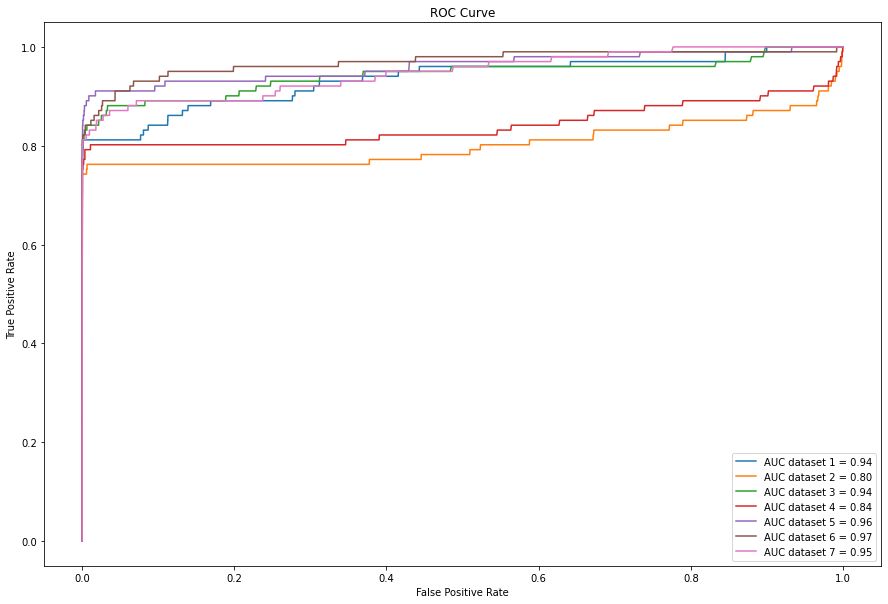

In [275]:
# Creation and testing of a model for the 7 sets of selected features with
# undersampling of the dataset

datasets = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]
features_names = [v1, v2, v3, v4, v5, v6, v_random]
metrics_train_set = None
metrics_valid_set = None
metrics_test_set = None
ANN_parameters = list()
histories = list()
ROC_curves = dict()

for i, dataset in enumerate(datasets):
  # Creating the numpy array of the dataset
  dataset_np = dataset.to_numpy()
  # Splitting training set, validation set and test set
  x_train, y_train, x_valid, y_valid, x_test, y_test = train_split(dataset_np, percentage_train=0.7, percentage_validation=0.1)
  # Normalizing the training set
  x_train_normalized, data_train_min, data_train_max = min_max(x_train, None, None)
  # Undersampling the training set
  x_train_normalized, y_train = undersample(x_train_normalized, y_train, 50.)

  # Normalizing the validation set
  x_valid_normalized, _, _ = min_max(x_valid, data_train_min, data_train_max)
  # Normalizing the test set
  x_test_normalized, _, _ = min_max(x_test, data_train_min, data_train_max)

  # Creating the onehot representation of the datasets
  dim = 2
  y_train = onehot_representation(y_train, dim)
  y_valid = onehot_representation(y_valid, dim)
  y_test = onehot_representation(y_test, dim)
  
  # Definition of the model
  layers_size = [x_train.shape[1],30,30,10,2]

  # Training the ANN
  ANN_params, history = fit_classificator_ANN(x_train_normalized, y_train, x_valid_normalized, y_valid,
                                              layers_size, opt_method='RMSprop', num_epochs=2500, batch_size=256,
                                              learning_rate=1e-3, history_decay=0.8, regularization_parameter=0.1,
                                              class_weights=np.array([3.2,1.]))
  ANN_parameters.append(ANN_params)
  # Plotting the training history
  histories.append(history)

  # Getting predictions with the trained model on train set
  y_predicted = ANN(x_train_normalized, ANN_params)
  y_predicted = y_predicted >= 0.5
  # Computing metrics for the training set
  metrics_train_set = metrics(y_predicted[:,1], y_train[:,1], metrics_df=metrics_train_set, dataset_label='v'+str(i+1)+' training')
  
  # Getting predictions with the trained model on validation set
  y_predicted = ANN(x_valid_normalized, ANN_params)
  y_predicted = y_predicted >= 0.5
  # Computing metrics for the validation set
  metrics_valid_set = metrics(y_predicted[:,1], y_valid[:,1], metrics_df=metrics_valid_set, dataset_label='v'+str(i+1)+' validation')
  
  # Getting predictions with the trained model on test set
  y_probabilities = ANN(x_test_normalized, ANN_params) # different name for using the probabilities in the plot of the ROC curve
  y_predicted = y_probabilities >= 0.5
  # Computing metrics for the test set
  metrics_test_set = metrics(y_predicted[:,1], y_test[:,1], metrics_df=metrics_test_set, dataset_label='v'+str(i+1)+' test')
  
  # Compute ROC and AUC
  fpr, tpr, _ = roc_curve(y_test[:,1], y_probabilities[:,1])
  roc_auc = auc(fpr, tpr)
  
  # Plotting the ROC curve
  plt.plot(fpr, tpr, label='AUC dataset %d = %0.2f' % (i+1, roc_auc))

  # Save the ROC curve
  ROC_curves[i] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Save all the ROC curves for this classifier to plot them in the end
ROC_curves_per_classifier.append(ROC_curves)
  
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [276]:
# Displaying the metrics for the training set
metrics_train_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 training,262,16843,7,75,99.522895,77.744807,97.397770,86.468647
v2 training,234,16844,6,103,99.365800,69.436202,97.500000,81.109185
v3 training,247,16848,2,90,99.464712,73.293769,99.196787,84.300341
v4 training,241,16845,5,96,99.412347,71.513353,97.967480,82.675815
v5 training,268,16842,8,69,99.551987,79.525223,97.101449,87.438825
v6 training,275,16846,4,62,99.615989,81.602374,98.566308,89.285714
v7 training,261,16847,3,76,99.540350,77.448071,98.863636,86.855241


In [277]:
# Displaying the metrics for the validation set
metrics_valid_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 validation,42,28409,17,12,99.898174,77.777778,71.186441,74.336283
v2 validation,37,28418,8,17,99.912219,68.518519,82.222222,74.747475
v3 validation,41,28419,7,13,99.929775,75.925926,85.416667,80.392157
v4 validation,39,28417,9,15,99.915730,72.222222,81.250000,76.470588
v5 validation,42,28415,11,12,99.919242,77.777778,79.245283,78.504673
v6 validation,42,28414,12,12,99.915730,77.777778,77.777778,77.777778
v7 validation,42,28415,11,12,99.919242,77.777778,79.245283,78.504673


In [278]:
# Save the metrics
metrics_per_classifier.append(metrics_test_set)

# Displaying the metrics for the test set
metrics_test_set.style.hide_index()

Set of features,TP,TN,FP,FN,accuracy,recall,precision,F1-score
v1 test,78,56833,29,23,99.908713,77.227723,72.897196,75.000000
v2 test,67,56845,17,34,99.910468,66.336634,79.761905,72.432432
v3 test,68,56853,9,33,99.926268,67.326733,88.311688,76.404494
v4 test,66,56850,12,35,99.917490,65.346535,84.615385,73.743017
v5 test,80,56835,27,21,99.915735,79.207921,74.766355,76.923077
v6 test,82,56847,15,19,99.940312,81.188119,84.536082,82.828283
v7 test,77,56851,11,24,99.938557,76.237624,87.500000,81.481481



# Metrics visualization

In [279]:
# List with dataframes grouped by dataset
metrics_per_dataset = list()

for i in range(7):
  # Create dataframe with metrics of all classifiers for each dataset
  metric = pd.concat([metrics.iloc[[i]] for metrics in metrics_per_classifier]) 
  
  # Drop columns 'TP', 'TN', 'FP', 'FN'
  metric = metric.drop(metric.columns[1:5], axis=1)
  
  # Assign the name to each classifier
  metric = metric.rename(columns={'Set of features': 'classifier'})
  metric['classifier'] = ['LR', 'DT', 'RF', 'NB', 'ANN1', 'ANN2']

  # Save dataframe
  metrics_per_dataset.append(metric)
  
# Print all dataframes grouped by dataset
for metrics in metrics_per_dataset:
  # To round to two decimal places
  # display(metrics.round(2).style.hide_index())
  display(metrics.style.hide_index())
  print('\n')

classifier,accuracy,recall,precision,F1-score
LR,99.906370,70.967742,75.862069,73.333333
DT,99.926267,77.419355,81.081081,79.207921
RF,99.934459,75.483871,86.666667,80.689655
NB,97.773994,88.118812,6.617100,12.309820
ANN1,99.834981,78.217822,52.317881,62.698413
ANN2,99.908713,77.227723,72.897196,75.000000


classifier,accuracy,recall,precision,F1-score
LR,99.877111,38.709677,85.714286,53.333333
DT,99.899348,62.580645,77.600000,69.285714
RF,99.921585,71.612903,82.835821,76.816609
NB,97.954813,75.247525,6.250000,11.541382
ANN1,99.898180,55.445545,81.159420,65.882353
ANN2,99.910468,66.336634,79.761905,72.432432


classifier,accuracy,recall,precision,F1-score
LR,99.912222,61.290323,86.363636,71.698113
DT,99.906370,71.612903,75.510204,73.509934
RF,99.936800,76.774194,86.861314,81.506849
NB,98.397205,82.178218,8.486708,15.384615
ANN1,99.913979,77.227723,75.000000,76.097561
ANN2,99.926268,67.326733,88.311688,76.404494


classifier,accuracy,recall,precision,F1-score
LR,99.889985,45.161290,88.607595,59.829060
DT,99.895837,67.096774,73.239437,70.033670
RF,99.927437,72.903226,84.962406,78.472222
NB,97.784527,80.198020,6.122449,11.376404
ANN1,99.915735,64.356436,84.415584,73.033708
ANN2,99.917490,65.346535,84.615385,73.743017


classifier,accuracy,recall,precision,F1-score
LR,99.905200,70.967742,75.342466,73.089701
DT,99.920415,74.838710,80.000000,77.333333
RF,99.941481,75.483871,90.697674,82.394366
NB,97.691484,85.148515,6.204906,11.566913
ANN1,99.884135,85.148515,62.773723,72.268908
ANN2,99.915735,79.207921,74.766355,76.923077


classifier,accuracy,recall,precision,F1-score
LR,99.909881,76.129032,74.683544,75.399361
DT,99.902859,74.838710,72.500000,73.650794
RF,99.937970,76.129032,88.059701,81.660900
NB,97.486087,86.138614,5.780731,10.834371
ANN1,99.917490,85.148515,72.881356,78.538813
ANN2,99.940312,81.188119,84.536082,82.828283


classifier,accuracy,recall,precision,F1-score
LR,99.923926,72.258065,83.582090,77.508651
DT,99.899348,76.129032,70.658683,73.291925
RF,99.932118,72.903226,87.596899,79.577465
NB,97.779260,84.158416,6.371814,11.846690
ANN1,99.824447,81.188119,50.306748,62.121212
ANN2,99.938557,76.237624,87.500000,81.481481


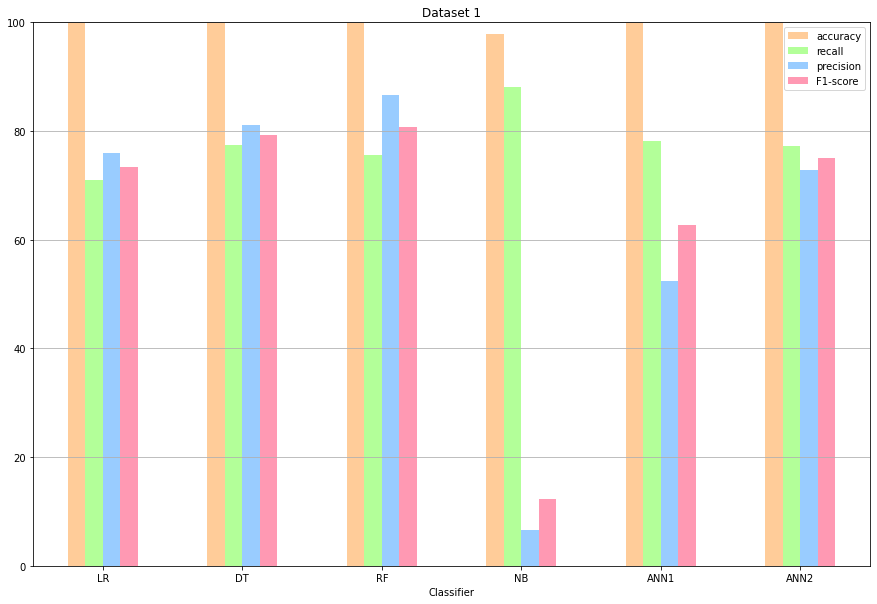

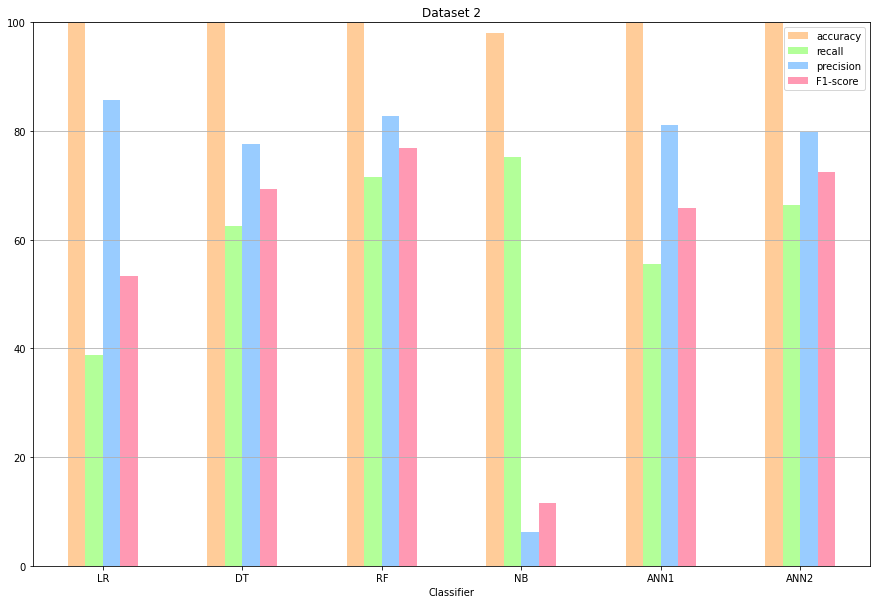

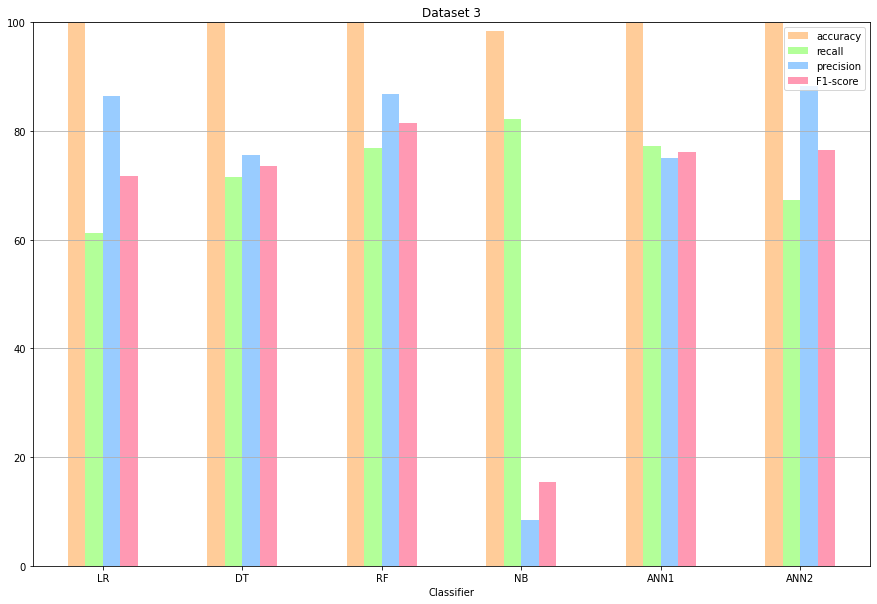

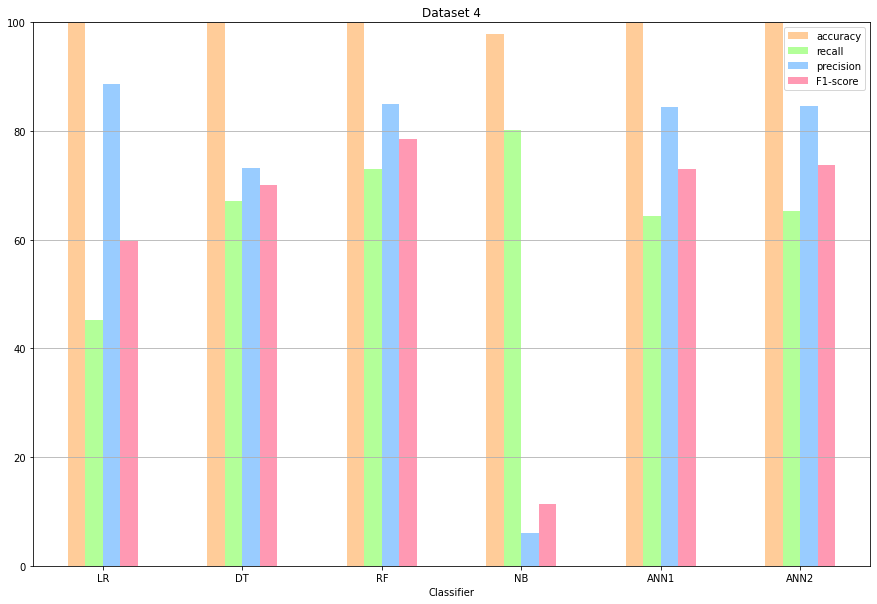

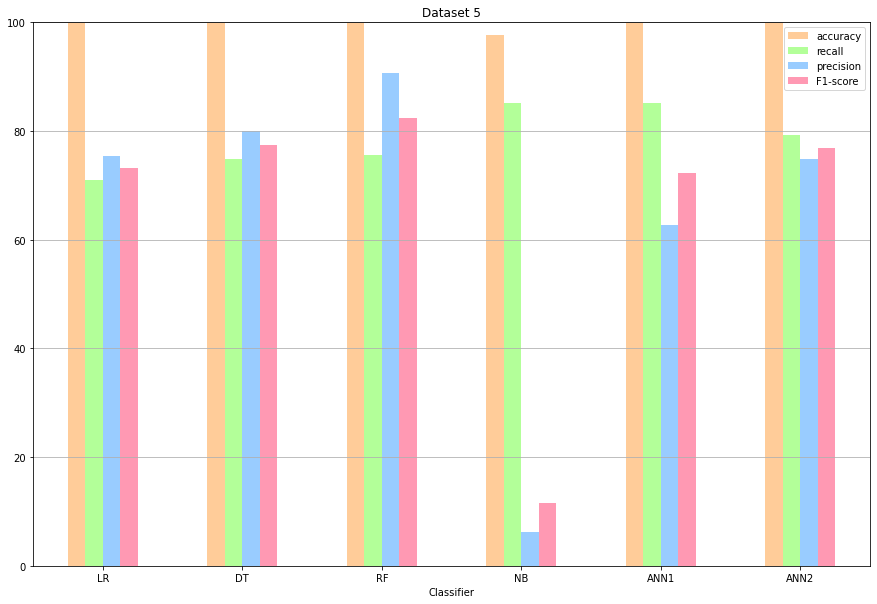

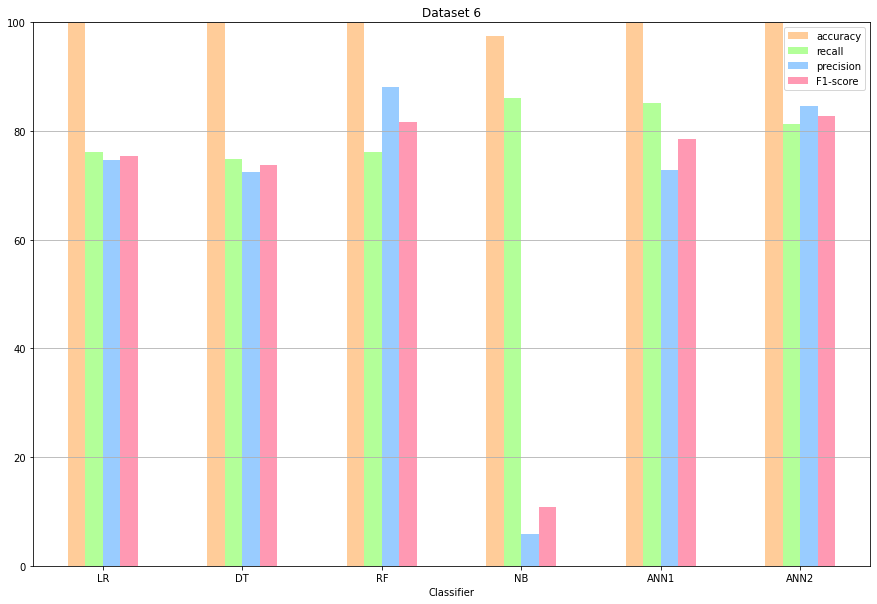

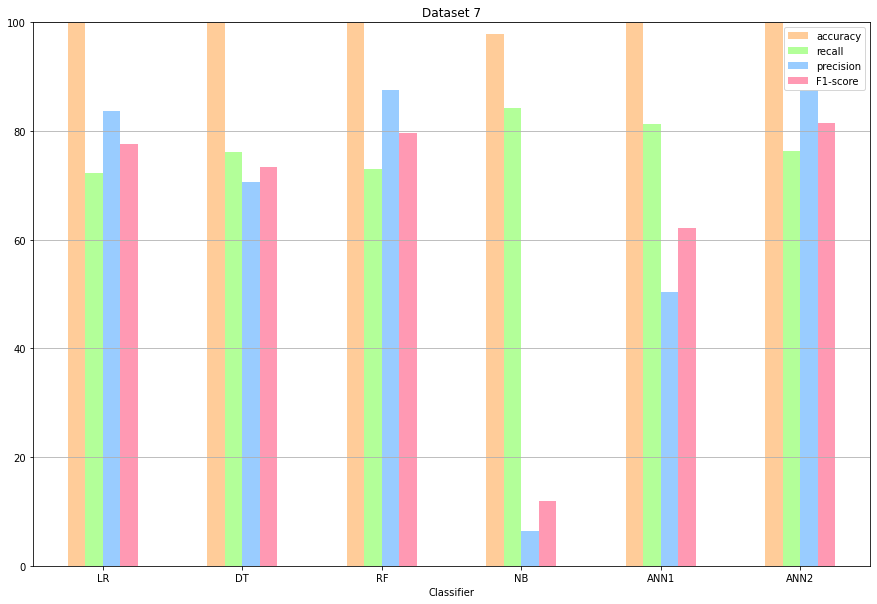

In [280]:
# Select colors of the bars
colors = [(255/255, 204/255, 153/255), (179/255, 255/255, 153/255), (153/255, 204/255, 255/255), (255/255, 153/255, 179/255)]

# Select columns to plot
cols = ['accuracy', 'recall', 'precision', 'F1-score']

# Print the metrics for all classifiers for each dataset
for i, metric in enumerate(metrics_per_dataset):
  # Create bar plot
  axs = metric[cols].plot(kind='bar', color=colors)
  axs.grid(axis='y')
  axs.set_ylim([0, 100])
  axs.set_xlabel('Classifier')
  axs.set_title('Dataset ' + str(i + 1))
  axs.set_xticklabels(metric['classifier'], rotation='horizontal')
  # To save images 
  # name = 'Dataset_' + str(i + 1) + '.png'
  # plt.savefig(name)
  # files.download(name)
  plt.show()

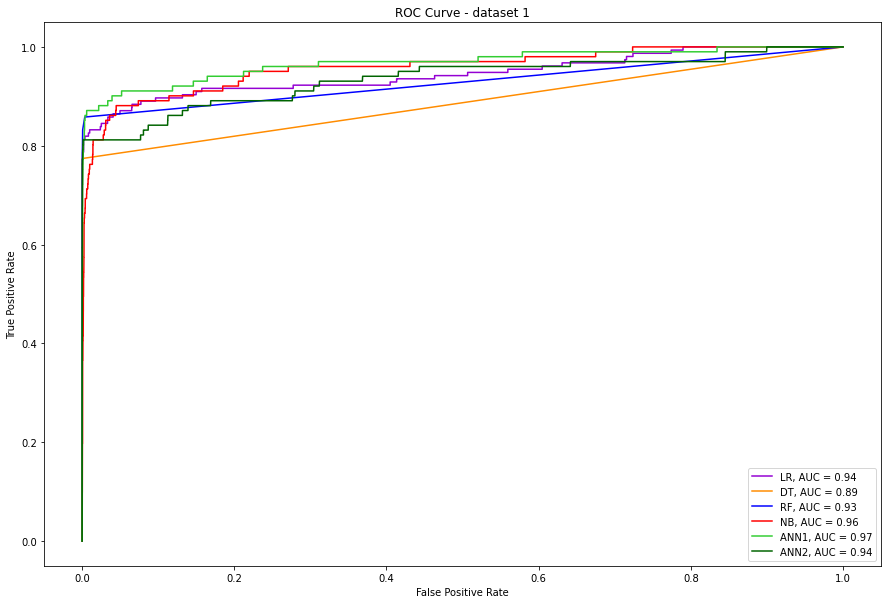

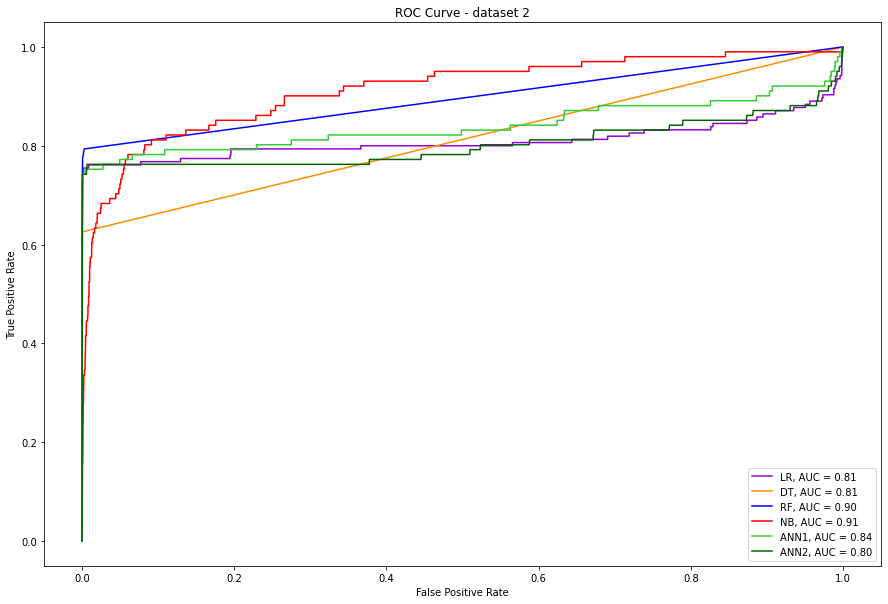

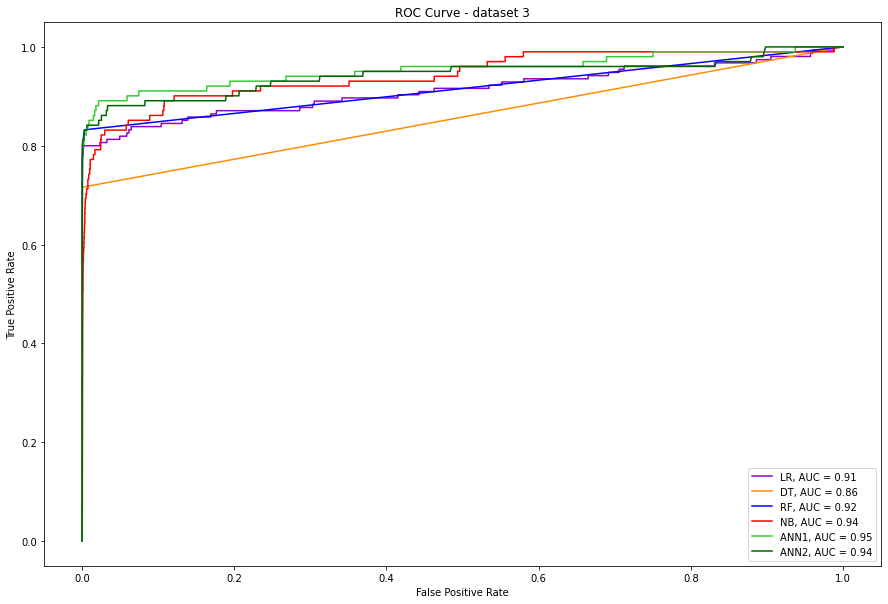

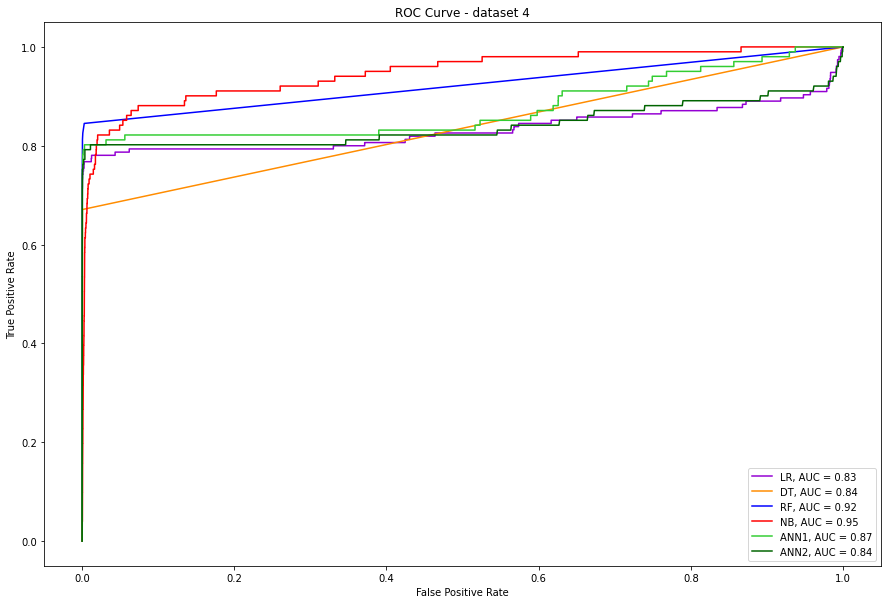

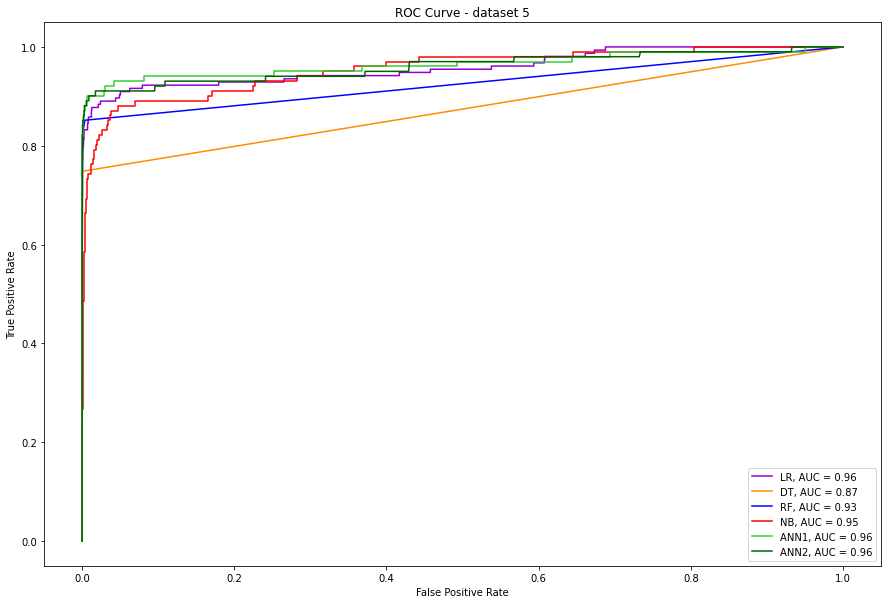

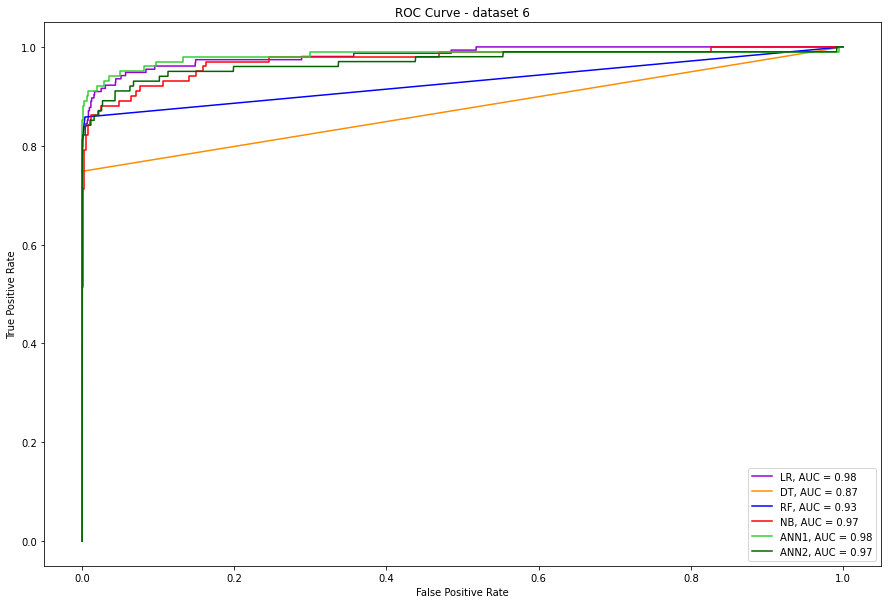

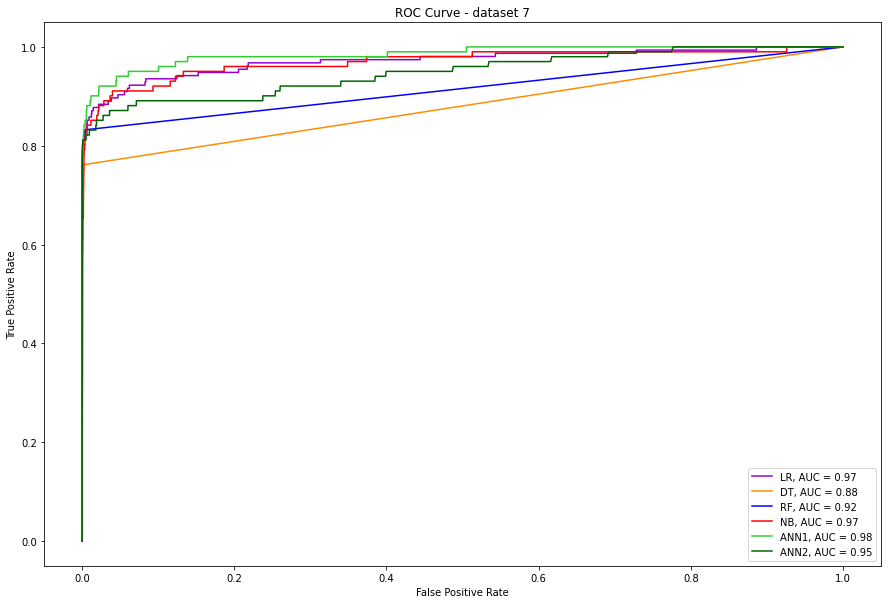

In [281]:
# To plot ROC curve of all classifiers for each dataset
classifiers = ['LR', 'DT', 'RF', 'NB', 'ANN1', 'ANN2']

# Select colors of the curves
colors = ['darkviolet', 'darkorange', 'blue', 'red', 'limegreen', 'darkgreen']

# Plot ROC curve of all classifiers for each dataset
for i in range(7):
  fig_ROC, axs_ROC = plt.subplots(1,1,figsize = (15,10))
  for classifier,ROC_curve in enumerate(ROC_curves_per_classifier):
    axs_ROC.plot(ROC_curve[i]['fpr'], ROC_curve[i]['tpr'], 
                    label=classifiers[classifier]+', AUC = %0.2f' % (ROC_curve[i]['auc']), color=colors[classifier])
  axs_ROC.set_title('ROC Curve - dataset ' + str(i + 1))
  axs_ROC.legend(loc='lower right')
  axs_ROC.set_xlabel('False Positive Rate')
  axs_ROC.set_ylabel('True Positive Rate')
  # To save images 
  # name = 'ROC_' + str(i + 1) + '.png'
  # plt.savefig(name)
  # files.download(name)